# Pip installs

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.4 MB/s eta 0:00:00


In [2]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e8f28d870e6fe8ccf947410d25c64bfc705294a40a63e123e756e3664619b1ea
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [3]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.5 MB/s eta 0:00:00


In [5]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00


# Imports

In [8]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
# import transformers as ppb
import seaborn as sns
import matplotlib.patheffects as PathEffects
import sklearn

%matplotlib inline

from time import time
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
# from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV
# from transformers import BertModel, BertConfig
from sklearn import neighbors, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [9]:
# # For doc2vecC we need to import files from personal google drive
# from google.colab import drive
# drive.mount('/content/drive/')

# Train dataframe

In [10]:
df=pd.read_csv('train.tsv',sep='\t', header=None)
df2=pd.read_csv('test.tsv',sep='\t', header=None)
df3=pd.read_csv('valid.tsv',sep='\t', header=None)

In [14]:
df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [53]:
df.head()

id        label                                          statement  \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   

  state_info party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0      Texas        republican      0.0      1.0      0.0      0.0      0.0   
1   Virginia          democrat      0.0      0.0      1.0      1.0      0.0   
2   Illinois          democrat     70.0     71.0    160.0    163.0      9.0   
3        NaN              none      7.0     19.0      3.0      5.0     44.0   
4    Florida          democrat     15.0      9.0     20.0     19.0      2.0   

               context  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [54]:
df.isnull().sum()

id                      0
label                   0
statement               0
subjects                2
speaker                 2
speaker_job_title    2897
state_info           2208
party_affiliation       2
count_1                 2
count_2                 2
count_3                 2
count_4                 2
count_5                 2
context               102
dtype: int64

In [55]:
# replaces all "null" or "NaN" values with an empty string
df.fillna("", inplace=True)
df.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [56]:
df['label'].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [57]:
df_2_cat_imb = df.copy()
df_2_cat_bal = df.copy()
df_3_cat_imb = df.copy()
df_3_cat_bal = df.copy()

In [58]:
df.shape

(10240, 14)

## Categories to codes

In [12]:
replace_label = {'false': 1, 'half-true': 2, 'mostly-true': 2, 'true': 2, 'barely-true': 2, 'pants-fire': 0}

In [19]:
df.label = [replace_label[item] for item in df.label]

KeyError: ignored

In [61]:
df.head(3)

id  label                                          statement  \
0   2635.json      1  Says the Annies List political group supports ...   
1  10540.json      2  When did the decline of coal start? It started...   
2    324.json      2  Hillary Clinton agrees with John McCain "by vo...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   

           context  
0         a mailer  
1  a floor speech.  
2           Denver

In [27]:
7406+926+905

9237

# Removing rows with more than 350 characters in their statement column

Run it for doc2vecC

In [62]:
df['ZipLen'] = df['statement'].astype(str).map(len)
df.head()

id  label                                          statement  \
0   2635.json      1  Says the Annies List political group supports ...   
1  10540.json      2  When did the decline of coal start? It started...   
2    324.json      2  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      1  Health care reform legislation is likely to ma...   
4   9028.json      2  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                         
4                        economy,jobs   charlie-crist                         

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   
3                         none     7.0    19.0     3.0     5.0    44.0   
4    Florida          democrat    15.0     9.0    20.0    19.0     2.0   

               context  ZipLen  
0             a mailer      82  
1      a floor speech.     141  
2               Denver     105  
3       a news release      78  
4  an interview on CNN      54

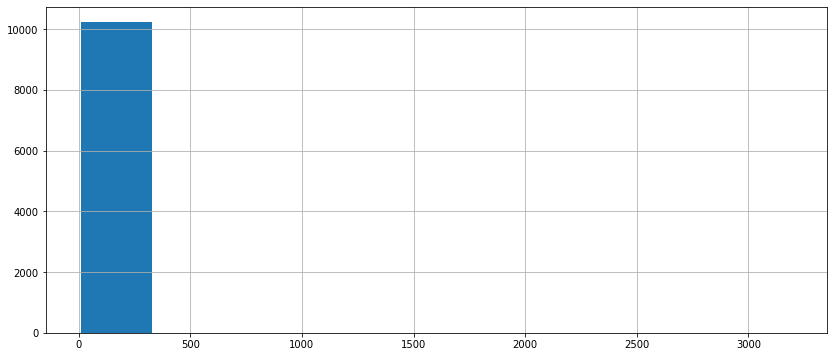

In [63]:
len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

# There should be some rows with more than 500 characters in statement

In [64]:
# Removing rows that contains more than 500 characters in statement

df = df[df.ZipLen < 350]

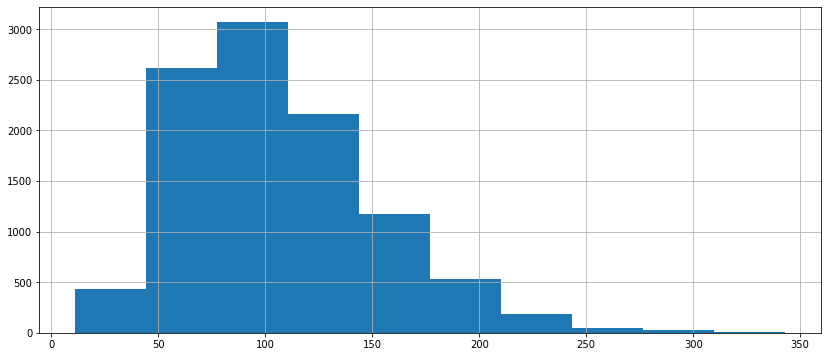

In [65]:
# Again see the distribution of the statement's length

len_sent = df['ZipLen']
len_sent.hist(figsize=[14,6]);

In [66]:
df.shape

(10232, 15)

# Test dataframe

In [67]:
df_test = pd.read_csv('test.tsv',sep='\t', header=None)
df_test.head(3)

0      1                                                  2   \
0  11972.json   true  Building a wall on the U.S.-Mexico border will...   
1  11685.json  false  Wisconsin is on pace to double the number of l...   
2  11096.json  false  Says John McCain has done nothing to help the ...   

                                3                  4                     5   \
0                      immigration         rick-perry              Governor   
1                             jobs  katrina-shankland  State representative   
2  military,veterans,voting-record       donald-trump       President-Elect   

          6           7   8    9   10  11  12                            13  
0      Texas  republican  30   30  42  23  18               Radio interview  
1  Wisconsin    democrat   2    1   0   0   0             a news conference  
2   New York  republican  63  114  51  37  61  comments on ABC's This Week.

In [68]:
df_test.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]

In [69]:
df_test.isnull().sum()

id                     0
label                  0
statement              0
subjects               0
speaker                0
speaker_job_title    325
state_info           262
party_affiliation      0
count_1                0
count_2                0
count_3                0
count_4                0
count_5                0
context               17
dtype: int64

In [70]:
df_test.fillna("", inplace=True)
df_test.isnull().sum()

id                   0
label                0
statement            0
subjects             0
speaker              0
speaker_job_title    0
state_info           0
party_affiliation    0
count_1              0
count_2              0
count_3              0
count_4              0
count_5              0
context              0
dtype: int64

In [71]:
df_2_cat_imb_test = df_test.copy()
df_2_cat_bal_test = df_test.copy()
df_3_cat_imb_test = df_test.copy()
df_3_cat_bal_test = df_test.copy()

## Changing the test labels to numbers

In [72]:
df_test.label = [replace_label[item] for item in df_test.label]

In [73]:
df_test.head(3)

id  label                                          statement  \
0  11972.json      2  Building a wall on the U.S.-Mexico border will...   
1  11685.json      1  Wisconsin is on pace to double the number of l...   
2  11096.json      1  Says John McCain has done nothing to help the ...   

                          subjects            speaker     speaker_job_title  \
0                      immigration         rick-perry              Governor   
1                             jobs  katrina-shankland  State representative   
2  military,veterans,voting-record       donald-trump       President-Elect   

  state_info party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0      Texas        republican       30       30       42       23       18   
1  Wisconsin          democrat        2        1        0        0        0   
2   New York        republican       63      114       51       37       61   

                        context  
0               Radio interview  
1             a news conference  
2  comments on ABC's This Week.

# Removing rows in test set that has statements more than 350 characters
Run it for doc2vecC

In [74]:
df_test['ZipLen'] = df_test['statement'].astype(str).map(len)
df_test.head()

id  label                                          statement  \
0  11972.json      2  Building a wall on the U.S.-Mexico border will...   
1  11685.json      1  Wisconsin is on pace to double the number of l...   
2  11096.json      1  Says John McCain has done nothing to help the ...   
3   5209.json      2  Suzanne Bonamici supports a plan that will cut...   
4   9524.json      0  When asked by a reporter whether hes at the ce...   

                                            subjects  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker     speaker_job_title state_info  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                        Wisconsin   

  party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0        republican       30       30       42       23       18   
1          democrat        2        1        0        0        0   
2        republican       63      114       51       37       61   
3        republican        1        1        3        1        1   
4          democrat        5        7        2        2        7   

                        context  ZipLen  
0               Radio interview      68  
1             a news conference      63  
2  comments on ABC's This Week.      51  
3                  a radio show      85  
4                   a web video     127

In [75]:
df_test = df_test[df_test.ZipLen < 350]

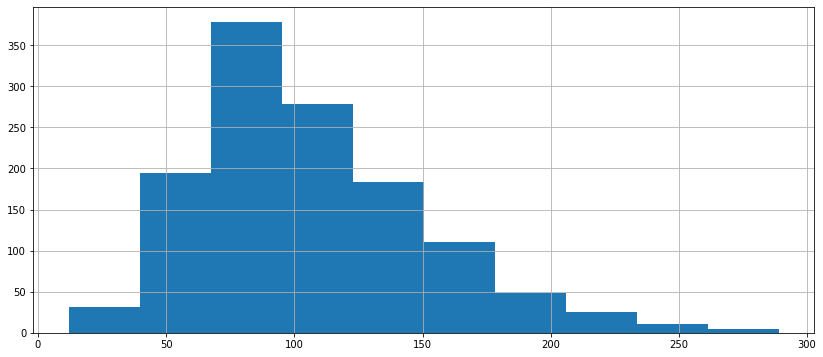

In [76]:
len_sent = df_test['ZipLen']
len_sent.hist(figsize=[14,6]);

In [77]:
df_test.shape

(1265, 15)

# Removing non-ascii characters in test and train dataframes

In [78]:
df.shape

(10232, 15)

In [79]:
df = df[df['statement'].map(lambda x: x.isascii())]

In [80]:
df.shape

(10226, 15)

In [81]:
df_test.shape

(1265, 15)

In [82]:
df_test = df_test[df_test['statement'].map(lambda x: x.isascii())]

In [83]:
df_test.shape

(1265, 15)

# Shell cells for doc2vecC

In [ ]:
# Creating "statements" folder in the drive. Read from statement column and create text files in the folder.

df.reset_index()
for i in df['statement'].index:
  with open('./drive/MyDrive/Liar_project/statements/sentences/'+ '{0:05}'.format(i) + '.txt', 'w') as f:
    f.write(df['statement'][i])

In [ ]:
# Now that we have all the input data we run go.sh script to create vectors
# The output would be a txt file with 256 features

%%shell

cd drive/MyDrive/Liar_project/
bash go.sh

rm: cannot remove 'sentences/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/sentences/norm.txt
Vocab size: 1947
Words in train file: 177186
Alpha: 0.000251  Progress: 99.90%  Words/thread/sec: 106.97k  finish embedding training
writing sentence vector ...

real	0m23.346s
user	0m34.377s
sys	0m0.432s


In [ ]:
# %%shell

# head -10 ./statements/sentences/norm.txt

In [ ]:
# %%shell

# mv ./wordvectors.txt drive/MyDrive/Liar_project/

In [ ]:
# Creating features without using np and then converting to np array

# with open("./drive/MyDrive/Liar_project/docvectors.txt", "r") as file:
#     features = [[x for x in line.split()] for line in file]

# features = np.array(features)

## TEST DATA

In [ ]:
df.reset_index()
for i in df_test['statement'].index:
  with open('./drive/MyDrive/Liar_project/statements/sentences_test/'+ '{0:04}'.format(i) + '.txt', 'w') as f:
    f.write(df_test['statement'][i])

In [ ]:
%%shell
cd drive/MyDrive/Liar_project/statements/sentences_test
ls | wc -l

1265


In [ ]:
df_test.shape

(1265, 15)

In [ ]:
%%shell

cd drive/MyDrive/Liar_project/
bash go.sh

rm: cannot remove 'sentences_test/norm.txt': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./statements/sentences_test/norm.txt
Vocab size: 374
Words in train file: 19081
finish embedding training
writing sentence vector ...

real	0m2.397s
user	0m3.760s
sys	0m0.222s


### IMDB test

In [ ]:
%%shell

cd drive/MyDrive/iclr2017-master/
bash go.sh

tar: aclImdb/train/unsup/127_0.txt: Cannot open: Input/output error
tar: Exiting with failure status due to previous errors
cat: train/pos/norm.txt: No such file or directory
cat: train/neg/norm.txt: No such file or directory
cat: train/unsup/norm.txt: No such file or directory
cat: test/pos/norm.txt: No such file or directory
cat: test/neg/norm.txt: No such file or directory
rm: cannot remove 'doc2vecc': No such file or directory
doc2vecc.c: In function ‘ReadVocab’:
doc2vecc.c:322:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
  322 |     fscanf(fin, "%lld%c", &vocab[a].cn, &c);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Starting training using file ./aclImdb/alldata.txt
Vocab size: 0
Words in train file: 0
finish embedding training
writing sentence vector ...

real	0m0.412s
user	0m0.188s
sys	0m0.205s


In [ ]:
features = np.loadtxt("./drive/MyDrive/Liar_project/iclr2017-master/docvectors.txt")
features.shape

OSError: ignored

In [ ]:
# features = np.loadtxt("./drive/MyDrive/Liar_project/iclr2017-master/aclImdb/alldata.txt")
# features.shape

df = pd.read_csv('./drive/MyDrive/Liar_project/iclr2017-master/aclImdb/alldata.txt')
df

ParserError: ignored

# Feature vectors from doc2vecC 

In [ ]:
df_test.shape

NameError: ignored

In [ ]:
# Create "features" numpy array from vectors 
features_dvc_test = np.loadtxt("./drive/MyDrive/Liar_project/docvectors_test.txt")
features_dvc_test_1 = features_dvc_test[:1265,:] 
features_dvc_test_1.shape

(1265, 256)

In [ ]:
features_dvc = np.loadtxt("./drive/MyDrive/Liar_project/docvectors.txt")
features_dvc.shape

(10234, 256)

In [ ]:
features_dvc = features_dvc[:10232,:]

In [ ]:
df.shape

(10226, 15)

In [ ]:
X_train = features_dvc
y_train = df.label

X_test = features_dvc_test_1
y_test = df_test.label

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10232, 256), (10232,), (1265, 256), (1265,))

In [ ]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
print(Counter(y_under))

Counter({2: 7400, 1: 1993, 0: 839})
Counter({1: 1993, 0: 839, 2: 839})


In [ ]:
# SVM
from sklearn.metrics import accuracy_score
clf = svm.NuSVC(kernel = 'poly',gamma="auto", probability=True)
clf.fit(X_under, y_under)


# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5114624505928854


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_best = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=18.102766798418973%


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average= 'weighted')

0.1675857253889423

In [ ]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_SVM = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_SVM, multi_class="ovo")

0.4966702086594701

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
f1_score(y_test, y_pred, average = 'weighted')

0.6165444026957714

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, labels=[0,1,2], average='weighted')

0.5591945442682476

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, labels=[0,1,2], average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5338015077971703

In [ ]:
y_score = np.array([y for y in clf.predict_proba(X_test)])
pred_SVM = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_SVM, multi_class="ovo")

0.5360063205957654

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_train, y_train)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=69.24901185770752%


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
f1_score(y_test, pred, average = 'weighted')

0.6160846739480628

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, labels=[0,1,2], average='weighted')

0.5807287288298145

In [ ]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_KNN = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_KNN, multi_class="ovo")

0.5317635826573752

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.80


In [ ]:
# Creating labels from label column of df

labels = df['label']
labels

0        1
1        2
2        2
3        1
4        2
        ..
10235    2
10236    2
10237    2
10238    1
10239    0
Name: label, Length: 9849, dtype: int64

In [ ]:
labels.shape, df.shape, features.shape

((9849,), (9849, 15), (9849, 256))

# TSNE & PCA of Doc2vecC

### TSNE

In [ ]:
labels = df.label
labels.shape, features_dvc.shape

((10232,), (10232, 256))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(features_dvc)

NameError: ignored

In [ ]:
z.shape, labels.shape, features_dvc.shape

((10232, 2), (10232,), (10232, 256))

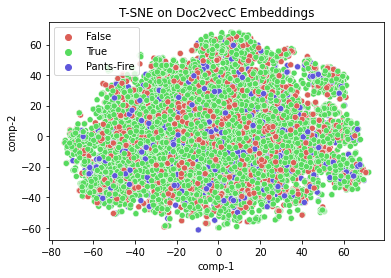

In [ ]:
df1 = pd.DataFrame()
labels = df['label'].map({0: 'Pants-Fire', 1: 'False', 2: 'True'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE on Doc2vecC Embeddings");
plt.savefig('doc2vecC-tsne-multiclass.png')

### Another approch of TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9849 samples in 0.002s...
[t-SNE] Computed neighbors for 9849 samples in 2.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9849
[t-SNE] Computed conditional probabilities for sample 2000 / 9849
[t-SNE] Computed conditional probabilities for sample 3000 / 9849
[t-SNE] Computed conditional probabilities for sample 4000 / 9849
[t-SNE] Computed conditional probabilities for sample 5000 / 9849
[t-SNE] Computed conditional probabilities for sample 6000 / 9849
[t-SNE] Computed conditional probabilities for sample 7000 / 9849
[t-SNE] Computed conditional probabilities for sample 8000 / 9849
[t-SNE] Computed conditional probabilities for sample 9000 / 9849
[t-SNE] Computed conditional probabilities for sample 9849 / 9849
[t-SNE] Mean sigma: 0.233414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.996193
[t-SNE] KL divergence after 1000 iterations: 2.959854


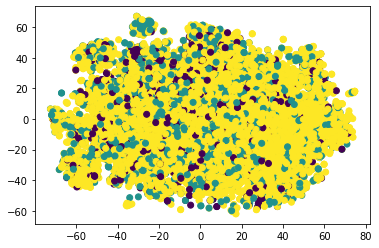

In [ ]:
tsne_results = tsne.fit_transform(features)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=labels)
plt.show();

#### TSNE using x_train and y_train

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.005s...
[t-SNE] Computed neighbors for 10226 samples in 5.705s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.291320
[t-SNE] KL divergence after 50 iterations with early exaggeration: 96.826698
[t-SNE] KL d

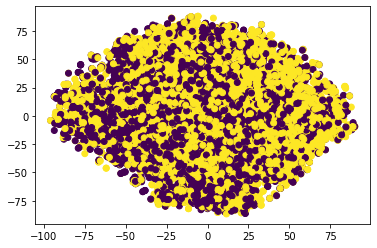

In [ ]:
tsne_results = tsne.fit_transform(X_train)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=y_train)
plt.show();

### PCA

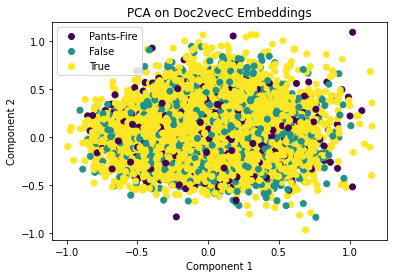

In [ ]:
pca = PCA(n_components = 2)
# Xt = pca.fit_transform(features)
pca = pca.fit(features_dvc)
Xt = pca.transform(features_dvc)
labels = df['label']

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-Fire','False','True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA on Doc2vecC Embeddings")
plt.savefig('doc2vecC-PCA-multiclass')
plt.show();

### 3D PCA

<Figure size 500x500 with 0 Axes>

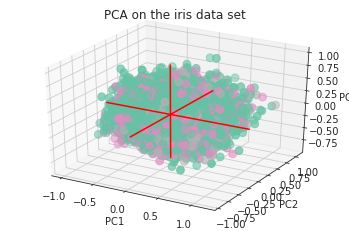

In [ ]:
sns.set_style("white")

# create figure
my_dpi=96
plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)
 
df['label']=pd.Categorical(df['label'])
my_color=df['label'].cat.codes
df_PCA_3D = df.copy()
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(features)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(features), columns=['PCA%i' % i for i in range(3)], index=df_PCA_3D.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show();

# BERT Feb 27 attempt


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
sentences = df.statement.tolist()

# Add the special tokens
mark_text = []
for text in sentences:
  mark_text.append("[CLS] " + text + " [SEP]")
n = len(mark_text)
# Split the sentence into tokens.
tokenized = []
for i in range(n):
  tokenized.append(tokenizer.tokenize(mark_text[i]))

# Map the token strings to their vocabulary indeces.
indexed = []
for i in range(n):
  indexed.append(tokenizer.convert_tokens_to_ids(tokenized[i]))

In [ ]:
len(indexed[1])

32

In [ ]:
# Mark each of the tokens as belonging to sentences.
segment_id = []
for i in range(0,n):
  segment_id.append([i+1] * len(tokenized[i]))

print(segment_id)
print(len(segment_id))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

In [ ]:
# Convert inputs to PyTorch tensors

# torch_empty = torch.empty(n)
token_tensor = []
for i in range(n):
  token_tensor.append(torch.tensor(indexed[i]))


max_len = max([x.squeeze().numel() for x in token_tensor])

# pad all tensors to have same length
token = [torch.nn.functional.pad(x, pad=(0, max_len - x.numel()),
                                mode='constant', value=0) for x in token_tensor]

# stack them
token = torch.stack(token)

print(token)
print(token.shape)

# Segment Tensor

segment_tensor = []
for i in range(n):
  segment_tensor.append(torch.tensor(segment_id[i]))


max_len = max([x.squeeze().numel() for x in segment_tensor])

# pad all tensors to have same length
seg = [torch.nn.functional.pad(x, pad=(0, max_len - x.numel()),
                                mode='constant', value=0) for x in segment_tensor]

# stack them
seg = torch.stack(seg)

print(seg)
print(seg.shape)
# # segments_tensors = torch.tensor([segment_id])

tensor([[  101,  2758,  1996,  ...,     0,     0,     0],
        [  101,  2043,  2106,  ...,     0,     0,     0],
        [  101, 18520,  7207,  ...,     0,     0,     0],
        ...,
        [  101,  2758,  2019,  ...,     0,     0,     0],
        [  101,  2006,  8783,  ...,     0,     0,     0],
        [  101,  1996,  2533,  ...,     0,     0,     0]])
torch.Size([10232, 78])
tensor([[    1,     1,     1,  ...,     0,     0,     0],
        [    2,     2,     2,  ...,     0,     0,     0],
        [    3,     3,     3,  ...,     0,     0,     0],
        ...,
        [10230, 10230, 10230,  ...,     0,     0,     0],
        [10231, 10231, 10231,  ...,     0,     0,     0],
        [10232, 10232, 10232,  ...,     0,     0,     0]])
torch.Size([10232, 78])


In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True,
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(token, seg)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 10232
Number of tokens: 78
Number of hidden units: 768


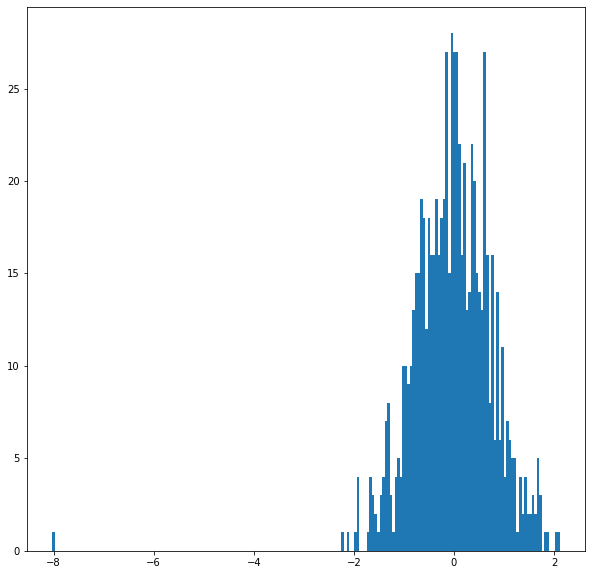

In [ ]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [ ]:
# `hidden_states` is a Python list.
print('Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([10232, 78, 768])


In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 10232, 78, 768])

In [ ]:
# # Remove dimension 1, the "batches".
# token_embeddings = torch.squeeze(token_embeddings, dim=0)
token_embeddings.size()

torch.Size([13, 10232, 78, 768])

In [ ]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2,3)

token_embeddings.size()

torch.Size([78, 13, 10232, 768])

In [ ]:
# `hidden_states` has shape [13 x 10232 x 78 x 768]
# hidden_states
# `token_vecs` is a tensor with shape [10232 x 78 x 768]
token_vecs = hidden_states[0]
token_vecs.size()
# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=1)
sentence_embedding.size()

torch.Size([10232, 768])

In [ ]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([10232, 768])


In [ ]:
sentence_embedding

tensor([[ 0.0905, -0.4342, -0.0283,  ..., -0.0246, -0.1683,  0.1553],
        [ 0.0291, -0.2546, -0.0989,  ..., -0.0167, -0.0356,  0.2095],
        [ 0.1453, -0.3442, -0.0518,  ...,  0.0218, -0.1998,  0.1969],
        ...,
        [ 0.0239, -0.2053, -0.0458,  ..., -0.0280, -0.0784,  0.1851],
        [ 0.1090, -0.4213, -0.0873,  ...,  0.0261, -0.1621,  0.1963],
        [ 0.0422, -0.1558, -0.0260,  ...,  0.1094, -0.0419,  0.1344]])

# BERT ON FULL DATASET


In [ ]:
df.shape

(10240, 14)

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

text = df.statement.tolist()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')
input_ids = tf.constant(tokenizer.encode(text))[None, :] 
outputs = model(input_ids)
last_hidden_states = outputs[0]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (10242 > 512). Running this sequence through the model will resul

ResourceExhaustedError: ignored

# Bert Modeling new attempt

In [ ]:
batch = df.sample(n=1500)

In [ ]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name)

model = BertModel.from_pretrained(model_name)
input_text = df.statement.tolist()

input_ids = tokenizer.encode(input_text, truncation=True, padding=True, add_special_tokens=True)

input_ids = torch.tensor([input_ids])

# with torch.no_grad():
#     last_hidden_states = model(input_ids)[0] # Models outputs are now tuples
with torch.no_grad():
    last_hidden_states = model(input_ids)
# print(last_hidden_states)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
features.shape

(1, 768)

# Bert Old attempt

In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text = df.statement.tolist()
encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='tf')
output = model(encoded_input)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


ResourceExhaustedError: ignored

In [ ]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1000, 65, 768), dtype=float32, numpy=
array([[[ 0.04515399, -0.08292667, -0.19509211, ..., -0.4085344 ,
          0.59999424,  0.12171835],
        [ 0.09584709,  0.08085372, -0.13973671, ..., -0.27474472,
          1.2137283 , -0.906009  ],
        [-0.13523939, -0.00642636, -0.35465744, ..., -0.7440727 ,
          0.36102417, -0.5436569 ],
        ...,
        [ 0.25595284, -0.4352928 ,  0.10091569, ..., -0.11257285,
         -0.06775718, -0.2802698 ],
        [-0.2818202 , -0.13926964,  0.24136531, ..., -0.27569598,
          0.31815463, -0.5991862 ],
        [-0.3701419 , -0.16211525,  0.03031321, ...,  0.27273118,
          0.435547  , -0.01318275]],

       [[-0.68227416, -0.1561765 , -0.24700962, ..., -0.320217  ,
          0.3793642 ,  0.348059  ],
        [ 0.480189  , -0.03928087, -0.51319313, ...,  0.39660802,
         -0.01553381, -0.407668  ],
        [-0.02941202, -0.5449047 , -0.2568558 ,

In [ ]:
features = output[1]

In [ ]:
features = output[0][:,0,:].numpy()

In [ ]:
features.shape

(1200, 768)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
encoded_input = tokenizer(batch.statement.tolist(), padding=True, truncation=True)

In [ ]:
# encoded_input

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# del encoding
encoding = tokenizer.encode_plus(df.statement.tolist(), add_special_tokens = True,
                                 truncation = True, padding = "max_length",
                                 return_attention_mask = True)

In [ ]:
from transformers import BertModel
from transformers import BertTokenizer, BertForMaskedLM
from torch.nn import functional as F
import torch.nn as nn

class Bert_Model(nn.Module):
  def __init__(self):
    super(Bert_Model, self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-uncased')
    self.out = nn.Linear(self.bert.config.hidden_size, ['0','1','2'])
  def forward(self, input):
    _, output = self.bert(**input)
    out = self.out(output)
    return out

In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text_test = df.statement.sample(n=1500)
text = text_test.tolist()
text
encoded_input = tokenizer(text, padding=True, truncation=True)
output = model(encoded_input)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


IndexError: ignored

In [ ]:
output = model(encoding)[0]

IndexError: ignored

In [ ]:
features = features.numpy()

# TSNE & PCA of Bert 2

### TSNE

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
labels.shape, features.shape

((1200,), (1200, 768))

In [ ]:
labels = y_pred
labels = labels.tolist()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1267 samples in 0.001s...
[t-SNE] Computed neighbors for 1267 samples in 0.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1267
[t-SNE] Computed conditional probabilities for sample 1267 / 1267
[t-SNE] Mean sigma: 0.305918
[t-SNE] KL divergence after 50 iterations with early exaggeration: 72.130112
[t-SNE] KL divergence after 1000 iterations: 1.880559


In [ ]:
z.shape, labels.shape, X_test.shape

((1267, 2), (1267,), (1267, 384))

In [ ]:
# del df1
# del df1["y"]
# del df1["comp-1"]
# del df1["comp-2"]
df1 = pd.DataFrame()
labels = labels.map({2: 'Pants-Fire', 1: 'False', 0: 'True'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE of S-Bert Embeddings on Test Data");
plt.savefig('s-Bert-tsne-test.png')

AttributeError: ignored

### Another approch of TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.915442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.934357
[t-SNE] KL divergence after 1000 iterations: 1.480246


<string>:6: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning:




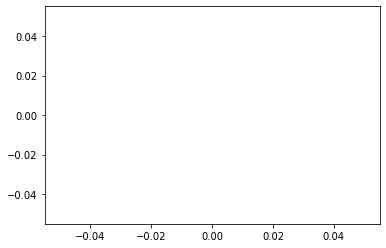

In [ ]:
tsne_results = tsne.fit_transform(features)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=labels)
plt.show();

#### TSNE using x_train and y_train

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.005s...
[t-SNE] Computed neighbors for 10226 samples in 5.705s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.291320
[t-SNE] KL divergence after 50 iterations with early exaggeration: 96.826698
[t-SNE] KL d

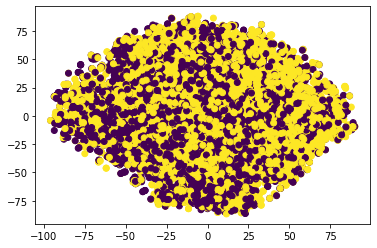

In [ ]:
tsne_results = tsne.fit_transform(X_train)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=y_train)
plt.show();

### PCA

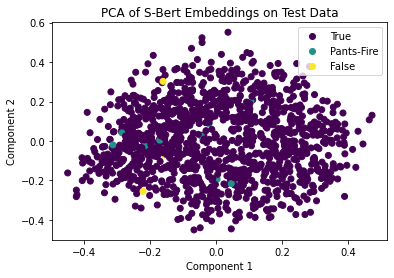

In [ ]:
pca = PCA(n_components = 2)
# Xt = pca.fit_transform(features)
pca = pca.fit(X_test)
Xt = pca.transform(X_test)
labels = y_pred
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['True', 'Pants-Fire', 'False'])
plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA of S-Bert Embeddings on Test Data")
plt.savefig('s-bert-PCA-predicted')
plt.show();


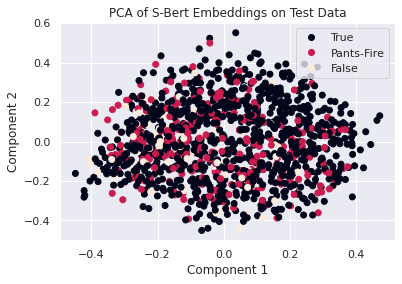

In [ ]:
pca = PCA(n_components = 2)
# Xt = pca.fit_transform(features)
pca = pca.fit(X_test)
Xt = pca.transform(X_test)
labels = y_test
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['True', 'Pants-Fire', 'False'])
plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA of S-Bert Embeddings on Test Data")
plt.savefig('Sbert-PCA-test')
plt.show();

### 3D PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 500x500 with 0 Axes>

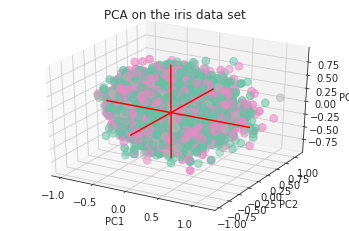

In [ ]:
sns.set_style("white")

# create figure
my_dpi=96
plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)
 
df['label']=pd.Categorical(df['label'])
my_color=df['label'].cat.codes
df_PCA_3D = df.copy()
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(features)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(features), columns=['PCA%i' % i for i in range(3)], index=df_PCA_3D.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show();

# Bert Model


In [ ]:
configuration = BertConfig(num_hidden_layers = 18)

In [ ]:
model_class = ppb.BertModel(configuration)

In [ ]:
tokenizer_class, pretrained_weights = (ppb.BertTokenizer, 'bert-base-uncased')

In [ ]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_positio

In [ ]:
# Testing the model with sample rows
batch_1 = df.sample(n=1000)

In [ ]:
batch_1.shape

(1000, 14)

In [ ]:
tokenized = df['statement'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True,
                                                                           truncation=True)))
# tokenized.values

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(1000, 66)

In [ ]:
padded

array([[  101,  7756,  2003, ...,     0,     0,     0],
       [  101,  2093,  2086, ...,     0,     0,     0],
       [  101, 12163,  1998, ...,     0,     0,     0],
       ...,
       [  101,  2343,  8112, ...,     0,     0,     0],
       [  101,  4406, 16204, ...,     0,     0,     0],
       [  101,  2006, 10078, ...,     0,     0,     0]])

In [ ]:
attention_mask = np.where(padded != 0,1, 0)
attention_mask.shape

(10240, 512)

In [ ]:
attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids)

In [ ]:
# last_hidden_states

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
features.shape

(1000, 768)

In [ ]:
# batch_1['label'] = batch_1['label'].replace(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
#        'pants-fire'],[0, 5, 8, 10, 2, -10])

In [ ]:
labels = batch_1['label']

In [ ]:
features.shape, labels.shape


((1000, 768), (1000,))

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 

import seaborn as sns
%matplotlib inline

X = list(features)

X_embedded = TSNE(n_components=2).fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
labels = batch_1.label
labels

5498    2
2125    2
5613    2
4189    0
5546    2
       ..
7613    1
6944    2
5790    2
8479    2
9125    0
Name: label, Length: 1000, dtype: int64

In [ ]:
df_embeddings = pd.DataFrame(X_embedded)

df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})
df_embeddings = df_embeddings.assign(label=labels.values)
df_embeddings

x          y  label
0    15.730571 -22.856670      2
1     0.062765 -18.926161      2
2    16.966469  19.464510      2
3    10.903811  14.543983      0
4    -5.620461  -1.776883      2
..         ...        ...    ...
995   0.585617  31.013769      1
996  13.951379  -7.353857      2
997  -5.987478  32.849155      2
998  11.384017 -15.857124      2
999  -9.956050  -1.620197      0

[1000 rows x 3 columns]

In [ ]:
df_embeddings = df_embeddings.assign(text=batch_1.statement.values)
replace_label = {'false': 1, 'half-true': 2, 'mostly-true': 2, 'true': 2, 'barely-true': 2, 'pants-fire': 0}
df_embeddings.label = [replace_label[item] for item in df_embeddings.label]
df_embeddings

x          y  label  \
0    -1.941162 -11.113579      2   
1     6.387394  16.907419      2   
2    -2.298528  -6.443890      0   
3    20.526024  25.953724      2   
4   -20.426191  -9.910270      2   
..         ...        ...    ...   
995   1.336814  -7.787250      2   
996  -4.809471   8.022119      2   
997 -17.706017 -24.990122      0   
998 -33.788288  -8.781835      2   
999 -31.998341  -3.216951      2   

                                                  text  
0    Nevada is No. 1 in unemployment, violent crime...  
1    Three years after getting the $100 million (fr...  
2    Unemployment and the housing and auto industry...  
3    If Senator Clinton or John McCain had stood up...  
4    There are a lot of casinos across the country ...  
..                                                 ...  
995  Roadside bombs are responsible for 70 percent ...  
996  Federal law requires residents to participate ...  
997  President Obamas refusal to grant permits for ...  
998  Unlike marijuana, medical cannabis oil cannot ...  
999  On opposing legislation that would take away e...  

[1000 rows x 4 columns]

In [ ]:
import plotly.express as px

fig = px.scatter(
     df_embeddings, x='x', y='y',
     color='label', labels=['pants','first','next'],
     hover_data= ['text'], title = 'Bert Word Embedding Visualization using TSNE')
fig.show()



ValueError: ignored

In [ ]:
ax.figure.savefig('file.png')

NameError: ignored

In [ ]:
labels = df['label']

In [ ]:
from transformers import BertModel
from transformers import AutoTokenizer, AutoConfig
import torch.nn as nn


class CustomBERTModel(nn.Module):
    def __init__(self):
          super(CustomBERTModel, self).__init__()
          self.bert = BertModel.from_pretrained("bert-base-cased")
          ### New layers:
          self.linear1 = nn.Linear(768, 256)
          self.linear2 = nn.Linear(256, 6) ## 6 is the number of classes in this example

    def forward(self, ids, mask):
          sequence_output, pooled_output = self.bert(
               ids, 
               attention_mask=mask)

          # sequence_output has the following shape: (batch_size, sequence_length, 768)
          # extract the 1st token's embeddings
          
          linear1_output = self.linear1(sequence_output[:,0,:].view(-1,768)) 

          linear2_output = self.linear2(linear1_output)

          return linear2_output

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-xxl-cased")
model = CustomBERTModel() # You can pass the parameters if required to have more flexible model
model.to(torch.device("cpu")) ## can be gpu
criterion = nn.CrossEntropyLoss() ## If required define your own criterion
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))
epochs = [10,20,50, 100]
for epoch in epochs:
    for state in enumerate(df.statement): 
        data = list(state[1])
        targets = labels[i] 
        
        optimizer.zero_grad()
        
        encoding = tokenizer.batch_encode_plus(data, return_tensors='pt', padding=True, truncation=True,max_length=50, add_special_tokens = True)
        attention_mask = encoding['attention_mask']
        input_ids = encoding['input_ids']
        outputs = model(input_ids, attention_mask)
        outputs = F.log_softmax(outputs, dim=1)
        
        
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AttributeError: ignored

In [ ]:
# Import the needed model(Bert, Roberta or DistilBert) with output_hidden_states=True
from transformers import (
    BertConfig, 
    BertTokenizer,
    TFBertForSequenceClassification
)
import tensorflow as tf


transformer_model = TFBertForSequenceClassification.from_pretrained('bert-large-cased', output_hidden_states=True)

input_ids = tf.keras.Input(shape=(128, ),dtype='int32')
attention_mask = tf.keras.Input(shape=(128, ), dtype='int32')

transformer = transformer_model([input_ids, attention_mask])    
hidden_states = transformer[1] # get output_hidden_states

hidden_states_size = 4 # count of the last states 
hiddes_states_ind = list(range(-hidden_states_size, 0, 1))

selected_hiddes_states = tf.keras.layers.concatenate(tuple([hidden_states[i] for i in hiddes_states_ind]))

# Now we can use selected_hiddes_states as we want
output = tf.keras.layers.Dense(128, activation='relu')(selected_hiddes_states)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
model = tf.keras.models.Model(inputs = [input_ids, attention_mask], outputs = output)
model.compile(tf.keras.optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
    # # Use PCA to reduce dimensions to a number that's manageable for t-SNE
    # pca = PCA(n_components = 50, random_state = 7)
    # X1 = pca.fit_transform(features)
    # # X5 = pca.fit_transform(X5)
    # if row == 0: print("Shape after PCA: ", X1.shape)

In [ ]:
# # Create a two dimensional t-SNE projection of the embeddings
# # tsne = TSNE(2, verbose=1)
# # tsne_proj = tsne.fit_transform(features)
# # Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(20,20))
# num_categories = 6
# for lab in range(num_categories):
#     indices = labels
#     ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(labels)).reshape(4,1000),label = labels ,alpha=0.5)
# ax.legend(fontsize='large', markerscale=0.5)
# plt.show()

In [ ]:
# c=np.array(cmap(labels))
# c.shape

# TSNE & PCA of Bert

### TSNE

In [ ]:
labels.shape, features.shape

((1000,), (1000, 768))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.998991
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.478600
[t-SNE] KL divergence after 1000 iterations: 1.552560


In [ ]:
z.shape, labels.shape, features.shape

((1000, 2), (1000,), (1000, 768))

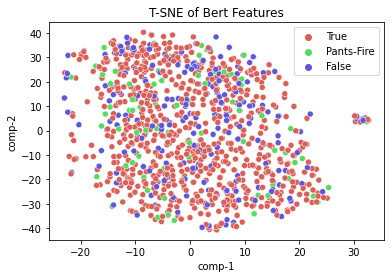

In [ ]:
df1 = pd.DataFrame()
labels = labels.map({0: 'Pants-Fire', 1: 'False', 2: 'True'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE of Bert Features");
plt.savefig('Bert-tsne.png')

### Another approch of TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.915442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.934357
[t-SNE] KL divergence after 1000 iterations: 1.480246


<string>:6: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning:




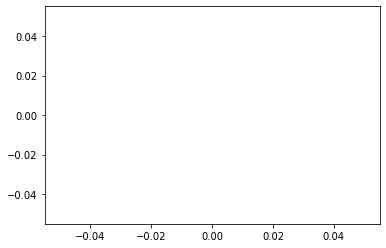

In [ ]:
tsne_results = tsne.fit_transform(features)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=labels)
plt.show();

#### TSNE using x_train and y_train

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.005s...
[t-SNE] Computed neighbors for 10226 samples in 5.705s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.291320
[t-SNE] KL divergence after 50 iterations with early exaggeration: 96.826698
[t-SNE] KL d

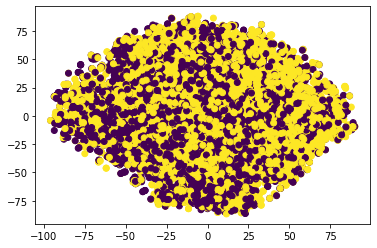

In [ ]:
tsne_results = tsne.fit_transform(X_train)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_results.shape
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=y_train)
plt.show();

### PCA

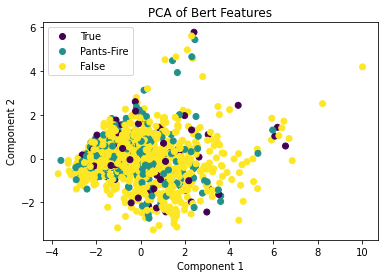

In [ ]:
pca = PCA(n_components = 2)
# Xt = pca.fit_transform(features)
pca = pca.fit(features)
Xt = pca.transform(features)
labels = batch_1.label
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['True', 'Pants-Fire', 'False'])
plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA of Bert Features")
plt.savefig('Bert-PCA')
plt.show();


### 3D PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 500x500 with 0 Axes>

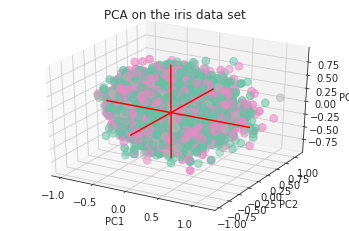

In [ ]:
sns.set_style("white")

# create figure
my_dpi=96
plt.figure(figsize=(500/my_dpi, 500/my_dpi), dpi=my_dpi)
 
df['label']=pd.Categorical(df['label'])
my_color=df['label'].cat.codes
df_PCA_3D = df.copy()
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(features)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(features), columns=['PCA%i' % i for i in range(3)], index=df_PCA_3D.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show();

# Bert final attempt

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
text = str(df.statement.tolist())
encoded_input = tokenizer(text, truncation=True, return_tensors='tf')

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "Lie", 1: "False", 2: "True"}
label2id = {"Lie": 0, "False": 1, "True": 2}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=3, id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=1
    # weight_decay=0.01,
    # evaluation_strategy="epoch",
    # save_strategy="epoch"
    # load_best_model_at_end=True
    # push_to_hub=True,
)

trainer = Trainer(
    model=model,
    # args=training_args,
    train_dataset=encoded_input,
    # eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 3
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3
  Number of trainable parameters = 109484547


IndexError: ignored

# BERT PROFESSOR LINK


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
sentences = df.statement.values
labels = df.label.values

In [ ]:
sentences.shape

(10226,)

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Says the Annies List political group supports third-trimester abortions on demand.
Tokenized:  ['says', 'the', 'annie', '##s', 'list', 'political', 'group', 'supports', 'third', '-', 'trim', '##ester', 'abortion', '##s', 'on', 'demand', '.']
Token IDs:  [2758, 1996, 8194, 2015, 2862, 2576, 2177, 6753, 2353, 1011, 12241, 20367, 11324, 2015, 2006, 5157, 1012]


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Says the Annies List political group supports third-trimester abortions on demand.
Token IDs: [101, 2758, 1996, 8194, 2015, 2862, 2576, 2177, 6753, 2353, 1011, 12241, 20367, 11324, 2015, 2006, 5157, 1012, 102]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 78

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 78 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # out.append(outputs)
        # print('len out:' , len(out))
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        batch_id = 0
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None,
                            attention_mask=b_input_mask)
            # mean_pooled = outputs[1][0].sum(axis=1) / b_input_mask.sum(axis=-1).unsqueeze(-1)
            # np.save(f'./embedding/{batch_id}.npy', mean_pooled.cpu())
            # batch_id += 1
          
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    288.    Elapsed: 0:00:07.
  Batch    80  of    288.    Elapsed: 0:00:11.
  Batch   120  of    288.    Elapsed: 0:00:16.
  Batch   160  of    288.    Elapsed: 0:00:20.
  Batch   200  of    288.    Elapsed: 0:00:24.
  Batch   240  of    288.    Elapsed: 0:00:28.
  Batch   280  of    288.    Elapsed: 0:00:33.

  Average training loss: 0.74
  Training epcoh took: 0:00:33

Running Validation...
  Accuracy: 0.74
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    288.    Elapsed: 0:00:04.
  Batch    80  of    288.    Elapsed: 0:00:08.
  Batch   120  of    288.    Elapsed: 0:00:13.
  Batch   160  of    288.    Elapsed: 0:00:17.
  Batch   200  of    288.    Elapsed: 0:00:21.
  Batch   240  of    288.    Elapsed: 0:00:25.
  Batch   280  of    288.    Elapsed: 0:00:30.

  Average training loss: 0.68
  Training epcoh took: 0:00:30

Running Validation...
  Accuracy: 0.74
  Validation took: 0:00:0

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import pandas as pd


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.statement.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 100 

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 10,226



In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# out = []
# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
batch_id = 0
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask,
                      output_hidden_states = True
                      )
      mean_pooled = outputs[1][0].sum(axis=1) / b_input_mask.sum(axis=-1).unsqueeze(-1)
      np.save(f'./embedding/{batch_id}.npy', mean_pooled.cpu())
      batch_id += 1

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 10,226 test sentences...
    DONE.


In [ ]:
len(outputs[1][0][0])

In [ ]:
a_loaded = np.load('./embedding/0.npy')
for i in range(1,103):
  a_loaded = np.concatenate((a_loaded, np.load(f'./embedding/{i}.npy')), axis=0)
len(a_loaded)

10226

In [ ]:
len(a_loaded[0])

In [ ]:
# sentence_embedding, _ = torch.max(out[0][1][0], dim=1)
# sentence_embedding

In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

In [ ]:
%%shell

zip -r embeddings.zip embeddings

In [ ]:
del model

In [ ]:
!nvidia-smi

### TSNE

In [ ]:
labels = y_pred_train
labels.shape, X_train.shape

((9203,), (9203, 768))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9203 samples in 0.003s...
[t-SNE] Computed neighbors for 9203 samples in 0.885s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9203
[t-SNE] Computed conditional probabilities for sample 2000 / 9203
[t-SNE] Computed conditional probabilities for sample 3000 / 9203
[t-SNE] Computed conditional probabilities for sample 4000 / 9203
[t-SNE] Computed conditional probabilities for sample 5000 / 9203
[t-SNE] Computed conditional probabilities for sample 6000 / 9203
[t-SNE] Computed conditional probabilities for sample 7000 / 9203
[t-SNE] Computed conditional probabilities for sample 8000 / 9203
[t-SNE] Computed conditional probabilities for sample 9000 / 9203
[t-SNE] Computed conditional probabilities for sample 9203 / 9203
[t-SNE] Mean sigma: 0.859393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.742058
[t-SNE] KL divergence after 1000 iterations: 1.867948


In [ ]:
z.shape, labels.shape, X_train.shape

((9203, 2), (9203,), (9203, 768))

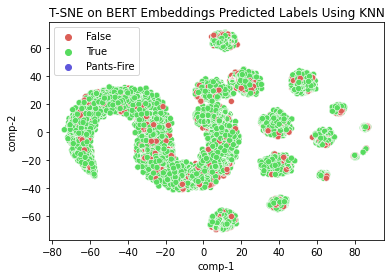

In [ ]:
df1 = pd.DataFrame()
labels = pd.Series(pred_train).map({1: 'False', 2: 'True', 0: 'pants-fire'})
df1["y"] = labels

df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-Fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE on BERT Embeddings Predicted Labels Using KNN");
plt.savefig('BERT-tsne-pred-knn.png')

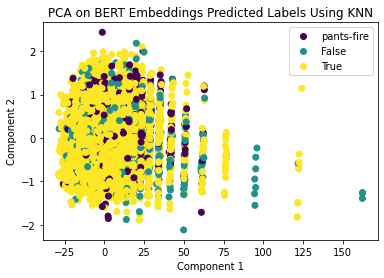

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(X_train)
Xt = pca.transform(X_train)
labels = pred_train
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['pants-fire','False', 'True'])
plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA on BERT Embeddings Predicted Labels Using KNN")
plt.savefig('Bert-PCA-pred-knn.png')
plt.show();

# KNN

In [ ]:
X_train.shape

(10226, 768)

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# X = features
# y = labels
# Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.5)

scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7225296442687748
              precision    recall  f1-score   support

           0       0.29      0.08      0.12        92
          10       0.33      0.06      0.10       249
         100       0.75      0.97      0.84       924

    accuracy                           0.72      1265
   macro avg       0.45      0.37      0.35      1265
weighted avg       0.63      0.72      0.64      1265

[[  7   8  77]
 [  7  14 228]
 [ 10  21 893]]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(Xtrain)

# Scale both X_train and X_test
X_train = scaler.transform(Xtrain)
X_test = scaler.transform(Xtest)

In [ ]:
# Create KNN Classifier
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=3, metric = 'cosine')

# Train the model using the training sets
knn_2.fit(Xtrain, y_train)

# Predict the response for test dataset
y_pred = knn_2.predict(Xtest)
print(y_pred)

acc_2 = accuracy_score(y_test, y_pred)
print(acc_2)

[5 5 1 ... 0 5 1]
0.20152462861610634


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
predicted = knn.predict(Xtest)

In [ ]:
acc = accuracy_score(y_test, predicted)

In [ ]:
print(acc)

0.19546520719311963


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


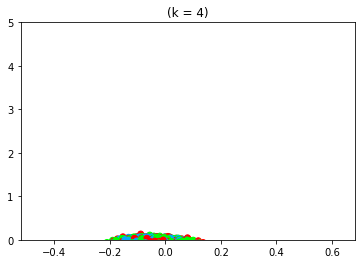

In [ ]:
import matplotlib
matplotlib.use('template')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


n_neighbors = 4
h = 0.02
X = features
y = labels.values

X_float = X.astype(np.float)
X_float

# # X_float.shape

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_float, y)



# calculate min, max and limits
x_min, x_max = X_float[:, 0].min() - 1, X_float[:, 0].max() + 1
y_min, y_max = X_float[:, 1].min() - 1, X_float[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# xx.ravel
# X_float[:, 0]
# last_column = np.c_[X_float, y]
# last_column = last_column[: , -1]

# last_column

# # predict class using data and kNN classifier
Z = clf.predict(X_float)


# # Put the result into a color plot
# # Z = Z.reshape(X_float[].shape)
plt.figure()
# # plt.pcolormesh(X_float, y, Z, cmap=cmap_light)

# # Plot also the training points
plt.scatter(X_float[:, 0], X_float[:, 1], c=y, cmap=cmap_bold)
plt.xlim(X_float.min(), X_float.max())
plt.ylim(y.min(), y.max())
plt.title("(k = %i)" % (n_neighbors))
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn import datasets, neighbors
# from mlxtend.plotting import plot_decision_regions

# x = features
# y = labels.values
# clf = neighbors.KNeighborsClassifier(n_neighbors=2)
# clf.fit(x, y)

# # Plotting decision region
# # plot_decision_regions(x, y, clf=clf)
# # Adding axes annotations
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Knn with k=3')
# plt.show()

# Sbert on df and df_test

In [ ]:
# Simple Sbert

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
len(embeddings)

10234

In [ ]:
labels = df.label

In [ ]:
#Test sentences 
test_sentences = df_test.statement.values.tolist()

#Sentences are encoded by calling model.encode()
test_embeddings = model.encode(test_sentences)

In [ ]:
X_train = embeddings
y_train = df.label

X_test = test_embeddings
y_test = df_test.label

In [ ]:
# from transformers import AutoTokenizer, AutoModel
# import torch


# #Mean Pooling - Take attention mask into account for correct averaging
# def mean_pooling(model_output, attention_mask):
#     token_embeddings = model_output[0] #First element of model_output contains all token embeddings
#     input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
#     sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
#     sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
#     return sum_embeddings / sum_mask



# #Sentences we want sentence embeddings for
# sentences = df.statement.values.tolist()

# #Load AutoModel from huggingface model repository
# tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
# model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# #Tokenize sentences
# encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=350, return_tensors='pt')

# #Compute token embeddings
# with torch.no_grad():
#     model_output = model(**encoded_input)

# #Perform pooling. In this case, mean pooling
# sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

In [ ]:
# X_train = sentence_embeddings
# y_train = df.label

# #Test sentences 
# test_sentences = df_test.statement.values.tolist()

# #Tokenize sentences
# encoded_input_test = tokenizer(test_sentences, padding=True, truncation=True, max_length=350, return_tensors='pt')

# #Compute token embeddings
# with torch.no_grad():
#     model_output_test = model(**encoded_input_test)

# #Perform pooling. In this case, mean pooling
# sentence_embeddings_test = mean_pooling(model_output_test, encoded_input_test['attention_mask'])

# X_test = sentence_embeddings_test
# y_test = df_test.label

# Binary SVM, acc, f1, ROC, precision, kappa
Almost balanced dataset, inspired with one of the papers to categorize false, pants fire and barely true in one category and other trues in another category

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(670, 768)

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# # 1
# clf = SVC(kernel='poly', degree = 2)
# clf.fit(X_train, y_train)


# # 2
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# dec = clf.decision_function(X_train)[1]
# print(dec.shape)


# # 3
# clf = make_pipeline(StandardScaler(), NuSVC(nu = 0.01,
#                                             kernel = 'poly',
#                                             decision_function_shape='ovo'))


# # 4, Acc = 0.7312
# clf = make_pipeline(StandardScaler(), NuSVC(nu = 0.1,
#                                             kernel = 'poly',
#                                             gamma = 'scale',
#                                             decision_function_shape='ovr',
#                                             break_ties = True))

# # 5: Acc= 0.44822 / failed to converge
# clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0,
#                                                 tol=1e-5,
#                                                 multi_class = 'ovr',
#                                                 max_iter = 20000
#                                                 ))



# # 6
# clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly',
#                                           decision_function_shape='ovr'))

# 7 without down sampling
clf = svm.SVC(kernel = 'poly',gamma="auto", probability=True,
                                            decision_function_shape='ovo')


# Fit the data
clf.fit(X_train, y_train)

# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))



0.5696969696969697


In [ ]:
from sklearn.metrics import f1_score
# f1_score(y_test, y_pred, average=None)
f1_score(y_test, y_pred, average= 'micro')

0.5696969696969697

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, labels=[10,100,0], average=None)
# precision_score(y_test, y_pred, labels=[0,100])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.56969697, 0.        ])

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, labels=[10,100,0], average=None)

array([0., 1., 0.])

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.0

In [ ]:
clf.classes_

array([  0,  10, 100])

In [ ]:
# replace_label = {10: 0, 100:1}
# y_test = [replace_label[item] for item in y_test]

In [ ]:
# ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: ignored

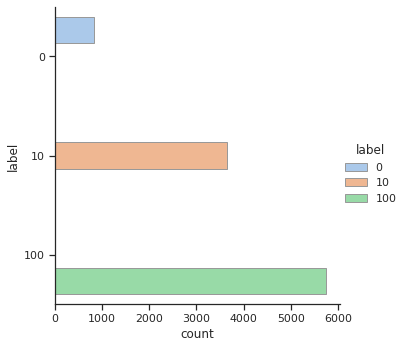

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="label", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

In [ ]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from matplotlib import pyplot
# from numpy import where
# from sklearn.preprocessing import LabelEncoder

# # summarize class distribution
# counter = Counter(y_train)
# print(counter)
# # define pipeline
# # over = SMOTE(sampling_strategy=0.1)

# # steps = [('o', over), ('u', under)]
# # pipeline = Pipeline(steps=steps)
# # transform the dataset
# y = LabelEncoder().fit_transform(y_train)
# strategy = {0:800, 1:1900, 2:4000}
# under = RandomUnderSampler(sampling_strategy=strategy)
# # oversample = SMOTE(sampling_strategy=strategy)
# X, y = under.fit_resample(X_train, y)

# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()
# # # summarize the new class distribution
# # counter = Counter(y)
# # print(counter)
# # # scatter plot of examples by class label
# # for label, _ in counter.items():
# # 	row_ix = where(y == label)[0]
# # 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# # pyplot.legend()
# # pyplot.show()

# Imbalanced dataset binary class, Sbert + SVM/KNN
False and pants fire VS trues

In [ ]:
# Replace train dataframe lables

replace_label = {'false': 10, 'half-true': 100, 'mostly-true': 100, 'true': 100, 'barely-true': 10, 'pants-fire': 10}
df_2_cat_imb.label = [replace_label[item] for item in df_2_cat_imb.label]
df_2_cat_imb.head()

id  label                                          statement  \
0   2635.json     10  Says the Annies List political group supports ...   
1  10540.json    100  When did the decline of coal start? It started...   
2    324.json    100  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json     10  Health care reform legislation is likely to ma...   
4   9028.json    100  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                         
4                        economy,jobs   charlie-crist                         

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   
3                         none     7.0    19.0     3.0     5.0    44.0   
4    Florida          democrat    15.0     9.0    20.0    19.0     2.0   

               context  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [ ]:
# Replace test dataframe lables

df_2_cat_imb_test.label = [replace_label[item] for item in df_2_cat_imb_test.label]
df_2_cat_imb_test.head()

id  label                                          statement  \
0  11972.json    100  Building a wall on the U.S.-Mexico border will...   
1  11685.json     10  Wisconsin is on pace to double the number of l...   
2  11096.json     10  Says John McCain has done nothing to help the ...   
3   5209.json    100  Suzanne Bonamici supports a plan that will cut...   
4   9524.json     10  When asked by a reporter whether hes at the ce...   

                                            subjects  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker     speaker_job_title state_info  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                        Wisconsin   

  party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0        republican       30       30       42       23       18   
1          democrat        2        1        0        0        0   
2        republican       63      114       51       37       61   
3        republican        1        1        3        1        1   
4          democrat        5        7        2        2        7   

                        context  
0               Radio interview  
1             a news conference  
2  comments on ABC's This Week.  
3                  a radio show  
4                   a web video

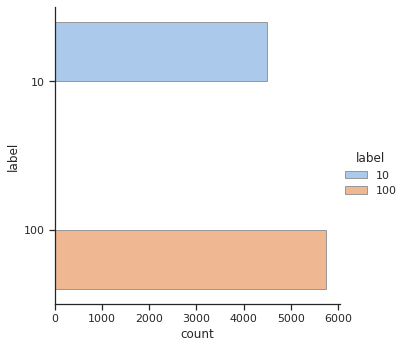

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="label", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_2_cat_imb);

In [ ]:
# Sbert for imbalanced

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df_2_cat_imb.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
#Test sentences 
test_sentences = df_2_cat_imb_test.statement.values.tolist()

#Sentences are encoded by calling model.encode()
test_embeddings = model.encode(test_sentences)

In [ ]:
X_train = embeddings
y_train = df_2_cat_imb.label

X_test = test_embeddings
y_test = df_2_cat_imb_test.label

In [ ]:
# SVM

clf = svm.NuSVC(kernel = 'rbf',gamma="auto", probability=True)
clf.fit(X_train, y_train)


# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5390686661404893


In [ ]:
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.5791015625


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_pred_train)

0.1440887387348252

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average= 'micro')

0.55327545382794

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, labels=[10,100], average=None)

array([0.32718894, 0.79220779])

In [ ]:
replace_label = {10: 0, 100:1}
Y_test = [replace_label[item] for item in y_test]

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.610


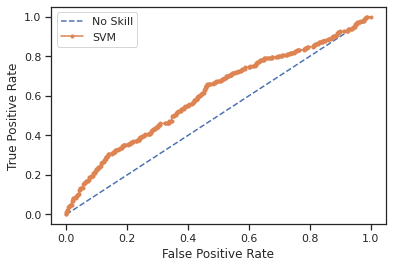

In [ ]:
# ROC for SVM

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_train, y_train)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=57.537490134175215%


In [ ]:
y_pred_knn_train = knn_best.predict(X_train)
print("Accuracy={}%".format((sum(y_train == y_pred_knn_train)/y_train.shape[0])*100))

Accuracy=71.5625%


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_pred_knn_train)

0.4304260924310679

In [ ]:
# Different KNN
scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7213891081294396
              precision    recall  f1-score   support

          10       0.46      0.21      0.29       341
         100       0.76      0.91      0.83       926

    accuracy                           0.72      1267
   macro avg       0.61      0.56      0.56      1267
weighted avg       0.68      0.72      0.68      1267

[[ 72 269]
 [ 84 842]]


No Skill: ROC AUC=0.500
KNN: ROC AUC=0.539


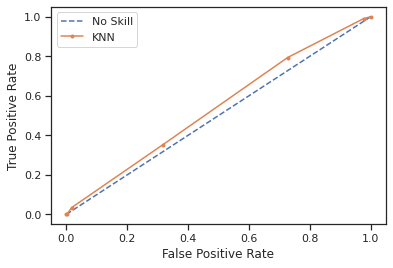

In [ ]:
# ROC for KNN

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
KNN_best: ROC AUC=0.595


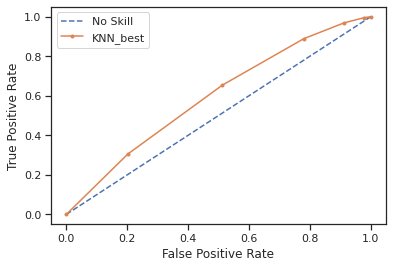

In [ ]:
# ROC for KNN_best

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN_best: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Balanced dataset binary class, Sbert + SVM/KNN
False and pants fire VS trues

In [45]:
# Replace train dataframe lables

replace_label = {'false': 0, 'half-true': 1, 'mostly-true': 1, 'true': 1, 'barely-true': 0, 'pants-fire': 0}
df_2_cat_bal.label = [replace_label[item] for item in df_2_cat_bal.label]
df_2_cat_bal.head()

id  label                                          statement  \
0   2635.json      0  Says the Annies List political group supports ...   
1  10540.json      1  When did the decline of coal start? It started...   
2    324.json      1  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      0  Health care reform legislation is likely to ma...   
4   9028.json      1  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                         
4                        economy,jobs   charlie-crist                         

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   
3                         none     7.0    19.0     3.0     5.0    44.0   
4    Florida          democrat    15.0     9.0    20.0    19.0     2.0   

               context  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [41]:
# Replace test dataframe lables

replace_label = {'false': 10, 'half-true': 100, 'mostly-true': 100, 'true': 100, 'barely-true': 100, 'pants-fire': 10}
df_2_cat_bal_test.label = [replace_label[item] for item in df_2_cat_bal_test.label]
df_2_cat_bal_test.head()

id  label                                          statement  \
0  11972.json    100  Building a wall on the U.S.-Mexico border will...   
1  11685.json     10  Wisconsin is on pace to double the number of l...   
2  11096.json     10  Says John McCain has done nothing to help the ...   
3   5209.json    100  Suzanne Bonamici supports a plan that will cut...   
4   9524.json     10  When asked by a reporter whether hes at the ce...   

                                            subjects  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker     speaker_job_title state_info  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                        Wisconsin   

  party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0        republican       30       30       42       23       18   
1          democrat        2        1        0        0        0   
2        republican       63      114       51       37       61   
3        republican        1        1        3        1        1   
4          democrat        5        7        2        2        7   

                        context  
0               Radio interview  
1             a news conference  
2  comments on ABC's This Week.  
3                  a radio show  
4                   a web video

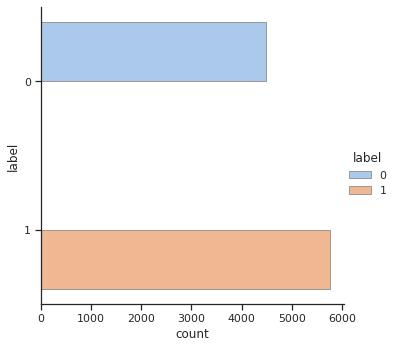

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="label", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_2_cat_bal);

In [46]:
df_2_cat_bal['ZipLen'] = df_2_cat_bal['statement'].astype(str).map(len)
df_2_cat_bal_test['ZipLen'] = df_2_cat_bal_test['statement'].astype(str).map(len)
df_2_cat_bal = df_2_cat_bal[df_2_cat_bal.ZipLen < 350]
df_2_cat_bal_test = df_2_cat_bal_test[df_2_cat_bal_test.ZipLen < 350]
df_2_cat_bal = df_2_cat_bal[df_2_cat_bal['statement'].map(lambda x: x.isascii())]
df_2_cat_bal_test = df_2_cat_bal_test[df_2_cat_bal_test['statement'].map(lambda x: x.isascii())]

In [47]:
# Sbert for imbalanced

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df_2_cat_bal.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [48]:
#Test sentences 
test_sentences = df_2_cat_bal_test.statement.values.tolist()

#Sentences are encoded by calling model.encode()
test_embeddings = model.encode(test_sentences)

In [49]:
X_train = embeddings
y_train = df_2_cat_bal.label

X_test = test_embeddings
y_test = df_2_cat_bal_test.label

In [50]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
print(Counter(y_under))

Counter({1: 5747, 0: 4479})
Counter({0: 4479, 1: 4479})


In [52]:
# SVM

clf = svm.NuSVC(kernel = 'rbf', probability=True)
clf.fit(X_under, y_under)

# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.0


In [49]:
y_pred_train_under = clf.predict(X_under)
print(accuracy_score(y_under, y_pred_train_under))

0.5896836007130125


In [51]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_train_under)

0.1793672014260249

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

ValueError: ignored

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, labels=[10,100], average=None)

array([0.31653747, 0.80527383])

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred, weights = 'quadratic')

0.10506115815681294

In [ ]:
replace_label = {10: 0, 100:1}
Y_test = [replace_label[item] for item in y_test]

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.588


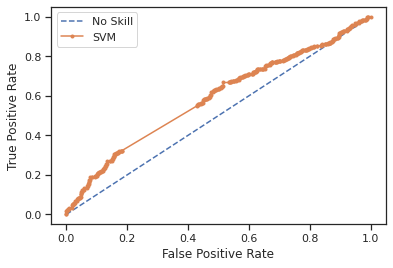

In [ ]:
# ROC for SVM

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=58.64246250986582%


In [ ]:
# Different KNN
scaler = preprocessing.StandardScaler().fit(X_under)
Xtrain = scaler.transform(X_under)
Xtest = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain, y_under)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5595895816890292
              precision    recall  f1-score   support

          10       0.34      0.65      0.44       341
         100       0.80      0.53      0.64       926

    accuracy                           0.56      1267
   macro avg       0.57      0.59      0.54      1267
weighted avg       0.68      0.56      0.58      1267

[[222 119]
 [439 487]]


No Skill: ROC AUC=0.500
KNN: ROC AUC=0.551


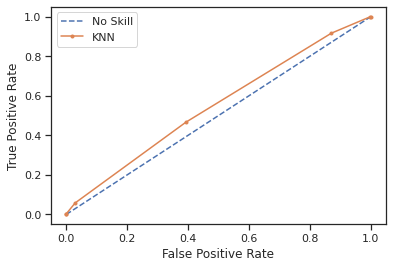

In [ ]:
# ROC for KNN

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
KNN_best: ROC AUC=0.591


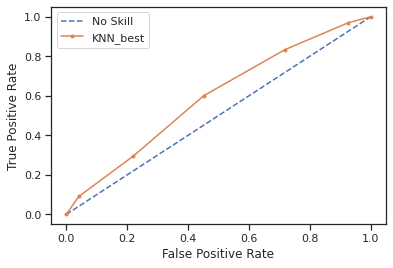

In [ ]:
# ROC for KNN_best

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN_best: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 3d tsne and pca for SBERT


# TSNE & PCA of S-Bert

### TSNE

In [ ]:
labels = y_pred_svm_train
labels.shape, X_train.shape

((10226,), (10226, 384))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10226 samples in 0.003s...
[t-SNE] Computed neighbors for 10226 samples in 7.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10226
[t-SNE] Computed conditional probabilities for sample 2000 / 10226
[t-SNE] Computed conditional probabilities for sample 3000 / 10226
[t-SNE] Computed conditional probabilities for sample 4000 / 10226
[t-SNE] Computed conditional probabilities for sample 5000 / 10226
[t-SNE] Computed conditional probabilities for sample 6000 / 10226
[t-SNE] Computed conditional probabilities for sample 7000 / 10226
[t-SNE] Computed conditional probabilities for sample 8000 / 10226
[t-SNE] Computed conditional probabilities for sample 9000 / 10226
[t-SNE] Computed conditional probabilities for sample 10000 / 10226
[t-SNE] Computed conditional probabilities for sample 10226 / 10226
[t-SNE] Mean sigma: 0.291320
[t-SNE] KL divergence after 50 iterations with early exaggeration: 96.826744
[t-SNE] KL d

In [ ]:
z.shape, labels.shape, X_train.shape

((10226, 2), (10226,), (10226, 384))

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
X_test

array([[ 0.01415029,  0.08941318,  0.00395085, ..., -0.01537195,
         0.03155039,  0.02123157],
       [-0.02618231, -0.10833932,  0.01708487, ..., -0.10409704,
         0.06821126, -0.02469684],
       [ 0.06854491,  0.08898341, -0.01895501, ..., -0.02354325,
         0.03712977, -0.01856813],
       ...,
       [-0.08719712,  0.09316558, -0.0510052 , ..., -0.01808335,
        -0.05760501, -0.09520192],
       [ 0.06504843,  0.02969272,  0.04572492, ..., -0.02784232,
         0.05451043,  0.0652144 ],
       [-0.03595338,  0.07267921,  0.10280494, ..., -0.02285791,
         0.05099695,  0.00437179]], dtype=float32)

In [ ]:
del df1
del labels

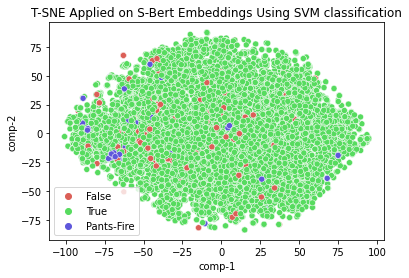

In [ ]:
df1 = pd.DataFrame()
labels = pd.Series(y_pred_svm_train)
labels = labels.map({ 1: 'False',0: 'Pants-Fire', 2: 'True'})
df1["y"] = labels

df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-Fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE Applied on S-Bert Embeddings Using SVM classification");
plt.savefig('SBert-tsne-predicted-svm.png')

### PCA

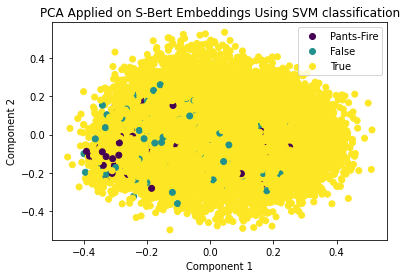

In [ ]:
pca = PCA(n_components = 2)
# Xt = pca.fit_transform(features)
pca = pca.fit(X_train)
Xt = pca.transform(X_train)
labels = y_pred_svm_train
plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-Fire','False', 'True'])
plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA Applied on S-Bert Embeddings Using SVM classification")
plt.savefig('SBert-PCA-predicted-svm.png')
plt.show();


# Imbalanced dataset multi class, Sbert + SVM/KNN
False vs pants fire VS trues

In [ ]:
df_3_cat_imb.shape

(10240, 14)

In [ ]:
# Replace train dataframe lables

replace_label = {'half-true': 2, 'mostly-true': 2, 'true': 2, 'barely-true': 2, 'pants-fire': 1, 'false': 0}
df_3_cat_imb.label = [replace_label[item] for item in df_3_cat_imb.label]
df_3_cat_imb.head()

id  label                                          statement  \
0   2635.json      0  Says the Annies List political group supports ...   
1  10540.json      2  When did the decline of coal start? It started...   
2    324.json      2  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      0  Health care reform legislation is likely to ma...   
4   9028.json      2  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                         
4                        economy,jobs   charlie-crist                         

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   
3                         none     7.0    19.0     3.0     5.0    44.0   
4    Florida          democrat    15.0     9.0    20.0    19.0     2.0   

               context  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [ ]:
# Replace test dataframe lables

# df_3_cat_imb_test.label = [replace_label[item] for item in df_3_cat_imb_test.label]
df_3_cat_imb_test = df_3_cat_imb_test[1:]

In [ ]:
df_3_cat_imb_test.shape

(1266, 14)

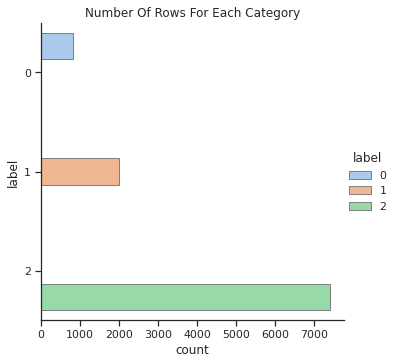

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="label", hue="label", kind="count",
            palette="pastel", edgecolor=".5",
            data=df).set(title="Number Of Rows For Each Category");

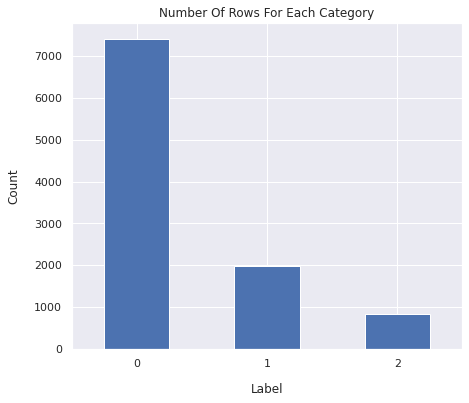

In [ ]:
sns.set(font_scale=1)
df_3_cat_imb['label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Number Of Rows For Each Category", y=1);
# plt.savefig('Imbalanced-data')

In [ ]:
# replace_label = {'True':0, 'Lie':1, 'False':2}
# df_3_cat_imb.label = [replace_label[item] for item in df_3_cat_imb.label]
# df_3_cat_imb.head()

In [ ]:
# replace_label = {'True':0, 'Lie':1, 'False':2}

# df_3_cat_imb_test.label = [replace_label[item] for item in df_3_cat_imb_test.label]
# df_3_cat_imb_test.head()

In [ ]:
# Sbert for imbalanced

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
#Test sentences 
test_sentences = df_test.statement.values.tolist()

#Sentences are encoded by calling model.encode()
test_embeddings = model.encode(test_sentences)

In [ ]:
X_train = embeddings
y_train = df.label

X_test = test_embeddings
y_test = df_test.label

In [ ]:
# SVM

clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf',
                                          decision_function_shape='ovo',
                                          probability=True))
clf.fit(X_train, y_train)

# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7328063241106719


In [ ]:
y_pred_svm_train = clf.predict(X_train)
print(accuracy_score(y_train, y_pred_svm_train))

0.7552317621748484


In [ ]:
clf.classes_

array([0, 1, 2])

In [ ]:
y_pred_copy = y_pred.copy()
y_pred_copy

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.unique()

array([0, 2, 1])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
f1_score(y_test, y_pred, average = 'weighted')

0.6290816917800632

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[919   6   1]
 [241   7   1]
 [ 91   0   1]]


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, labels=[0,1,2], average='weighted')

0.6669254845652953

In [ ]:
test = clf.predict_proba(X_train)
test

array([[0.07281178, 0.32185913, 0.60532909],
       [0.08274785, 0.32520763, 0.59204452],
       [0.0827374 , 0.32521477, 0.59204783],
       ...,
       [0.08274806, 0.32597219, 0.59127975],
       [0.10568576, 0.30733795, 0.58697629],
       [0.08288591, 0.32511771, 0.59199638]])

In [ ]:
y_test.shape

(330,)

In [ ]:
y_score = np.array([y for y in clf.predict_proba(X_test)])
pred_SVM = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_SVM, multi_class="ovo")

0.6537073105393056

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1267, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

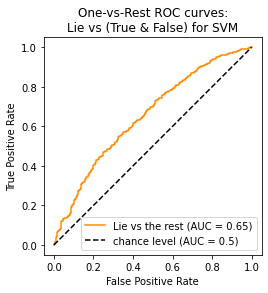

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name= "Lie vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nLie vs (True & False) for SVM")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-Lie');
plt.show()


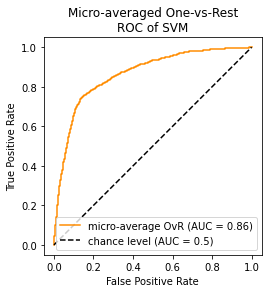

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC of SVM")
plt.legend()
plt.savefig('Imbalanced-SVM-Micro-average-ROC');
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.67


### ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.67


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.67


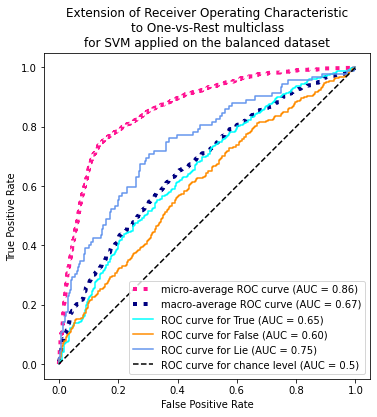

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-all')
plt.show()

### ROC left

In [ ]:
# replace_label = {10: 1, 100:2, 0:0}
# Y_test = [replace_label[item] for item in y_test]
# len(Y_test)

In [ ]:
# ROC for SVM

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [20 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)

# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(Y_test, ns_probs, multi_class= 'ovr', average= 'macro')
lr_auc = roc_auc_score(y_test, lr_probs, multi_class= 'ovr', average= 'macro')
# summarize scores
print('No Skill: ROC AUC=%.3f' % 0.5)
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.668


ValueError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


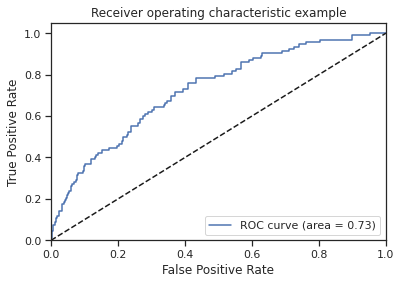

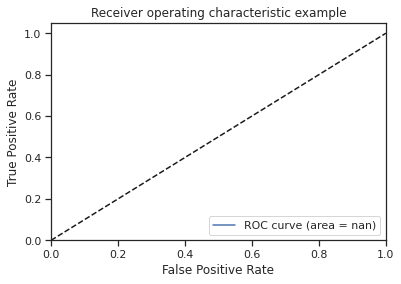

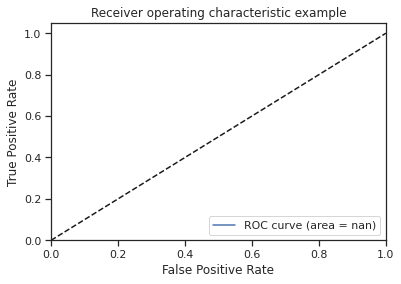

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

y_train = label_binarize(y_train, classes=[0,10,100])
y_test = label_binarize(y_test, classes=[0,10,100])
n_classes = 3



# classifier
clf = OneVsRestClassifier(SVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_train, y_train)

pred_knn = knn_best.predict(X_test)
print("Accuracy = {}%".format((sum(y_test==pred_knn)/y_test.shape[0])*100))

Accuracy = 68.69565217391305%


In [ ]:
pred_knn_train = knn_best.predict(X_train)
print("Accuracy = {}%".format((sum(y_train==pred_knn_train)/y_train.shape[0])*100))

Accuracy = 75.97300997457461%


In [ ]:
f1_score(y_test, pred_knn, average = 'weighted')

0.6480337029244013

In [ ]:
precision_score(y_test, pred_knn, labels=[0,1,2], average='weighted')

0.6367977459960084

In [ ]:
score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_score = score/score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_score, multi_class="ovo")

0.6077025179001919

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1267, 3)

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

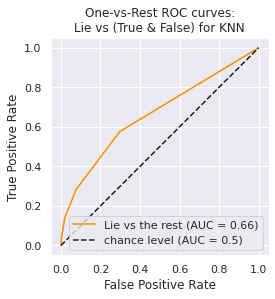

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    score[:, class_id],
    name= "Lie vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nLie vs (True & False) for KNN")
plt.legend()
plt.savefig('Imbalanced-KNN-ROC-Lie');
plt.show()

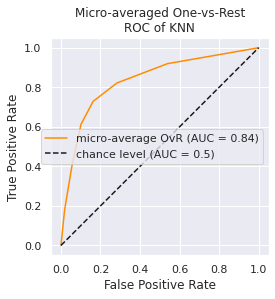

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC of KNN")
plt.legend()
plt.savefig('Imbalanced-KNN-Micro-average-ROC');
plt.show()

### ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.84


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.67


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.61


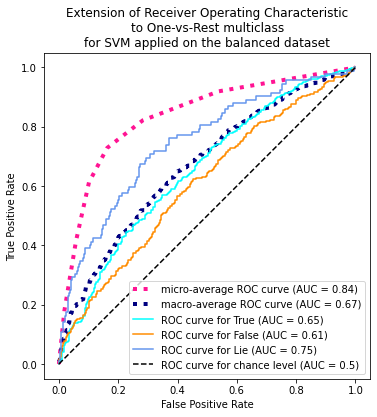

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-KNN-ROC-all')
plt.show()

In [ ]:
!pip install pylatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatex: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42818 sha256=4a7d87e9c76eacbba42d139f1c2c457c2629f1b23151c85d5d9f5771ed763fa4
  Stored in directory: /root/.cache/pip/wheels/11/33/be/8b396510c8b5aaf308d22248f7cb1cf90fef1039583f7a7e15
Successfully built pylatex


In [ ]:
!pip install pdflatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [ ]:
from pylatex import Document, Package, Section, NoEscape
import pdflatex
result = pd.DataFrame([["SVM", '73%', '73%', '65%', '73%', '85%'],["KNN",'73%', '73%', '65%', '73%', '85%']],
                      columns=["Model", "Accuracy", "F-1 ", "Precision", "ROC Accuracy", "ROC Micro-average"])

geometry_options = {"tmargin": "1cm", "lmargin": "10cm"}
doc = Document(geometry_options=geometry_options)
doc.packages.append(Package('booktabs'))

with doc.create(Section("Results")) as target:
  target.append(NoEscape(df.to_latex(multicolumn=False)))

doc.generate_pdf('full', clean_tex=False)

CompilerError: ignored

In [ ]:
# Different KNN
scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9265982636148382
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        92
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

   micro avg       0.33      0.01      0.02        92
   macro avg       0.11      0.00      0.01        92
weighted avg       0.33      0.01      0.02        92
 samples avg       0.00      0.00      0.00        92



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

ValueError: ignored

In [ ]:
# ROC for KNN

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

TypeError: ignored

In [ ]:
# ROC for KNN_best

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = knn_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN_best: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

TypeError: ignored

# Balanced dataset multi class, Sbert + SVM/KNN
False vs pants fire vs trues

In [84]:
# Replace train dataframe lables

replace_label = {'false': 1, 'half-true': 2, 'mostly-true': 2, 'true': 2, 'barely-true': 2, 'pants-fire': 0}
df_3_cat_bal.label = [replace_label[item] for item in df_3_cat_bal.label]
df_3_cat_bal.head()

id  label                                          statement  \
0   2635.json      1  Says the Annies List political group supports ...   
1  10540.json      2  When did the decline of coal start? It started...   
2    324.json      2  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      1  Health care reform legislation is likely to ma...   
4   9028.json      2  The economic turnaround started at the end of ...   

                             subjects         speaker     speaker_job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                         
4                        economy,jobs   charlie-crist                         

  state_info party_affiliation count_1 count_2 count_3 count_4 count_5  \
0      Texas        republican     0.0     1.0     0.0     0.0     0.0   
1   Virginia          democrat     0.0     0.0     1.0     1.0     0.0   
2   Illinois          democrat    70.0    71.0   160.0   163.0     9.0   
3                         none     7.0    19.0     3.0     5.0    44.0   
4    Florida          democrat    15.0     9.0    20.0    19.0     2.0   

               context  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [85]:
# Replace test dataframe lables


df_3_cat_bal_test.label = [replace_label[item] for item in df_3_cat_bal_test.label]
df_3_cat_bal_test.head()

id  label                                          statement  \
0  11972.json      2  Building a wall on the U.S.-Mexico border will...   
1  11685.json      1  Wisconsin is on pace to double the number of l...   
2  11096.json      1  Says John McCain has done nothing to help the ...   
3   5209.json      2  Suzanne Bonamici supports a plan that will cut...   
4   9524.json      0  When asked by a reporter whether hes at the ce...   

                                            subjects  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                            speaker     speaker_job_title state_info  \
0                        rick-perry              Governor      Texas   
1                 katrina-shankland  State representative  Wisconsin   
2                      donald-trump       President-Elect   New York   
3                     rob-cornilles            consultant     Oregon   
4  state-democratic-party-wisconsin                        Wisconsin   

  party_affiliation  count_1  count_2  count_3  count_4  count_5  \
0        republican       30       30       42       23       18   
1          democrat        2        1        0        0        0   
2        republican       63      114       51       37       61   
3        republican        1        1        3        1        1   
4          democrat        5        7        2        2        7   

                        context  
0               Radio interview  
1             a news conference  
2  comments on ABC's This Week.  
3                  a radio show  
4                   a web video

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", color_codes=True)

# sns.catplot(y="label", hue="label", kind="count",
#             palette="pastel", edgecolor=".6",
#             data=df_2_cat_bal);

In [86]:
df_3_cat_bal['ZipLen'] = df_3_cat_bal['statement'].astype(str).map(len)
df_3_cat_bal_test['ZipLen'] = df_3_cat_bal_test['statement'].astype(str).map(len)
df_3_cat_bal = df_3_cat_bal[df_3_cat_bal.ZipLen < 350]
df_3_cat_bal_test = df_3_cat_bal_test[df_3_cat_bal_test.ZipLen < 350]
df_3_cat_bal = df_3_cat_bal[df_3_cat_bal['statement'].map(lambda x: x.isascii())]
df_3_cat_bal_test = df_3_cat_bal_test[df_3_cat_bal_test['statement'].map(lambda x: x.isascii())]

In [87]:
# Sbert for imbalanced

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df_3_cat_bal.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [88]:
#Test sentences 
test_sentences = df_3_cat_bal_test.statement.values.tolist()

#Sentences are encoded by calling model.encode()
test_embeddings = model.encode(test_sentences)

In [89]:
X_train = embeddings
y_train = df_3_cat_bal.label

X_test = test_embeddings
y_test = df_3_cat_bal_test.label

In [90]:
# Random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
print(Counter(y_under))

Counter({2: 7397, 1: 1992, 0: 837})
Counter({0: 837, 1: 837, 2: 837})


In [ ]:
type(y_under)

pandas.core.series.Series

In [91]:
df_bal_multi = pd.DataFrame(X_under, y_under)
df_bal_multi.head()

0         1         2         3         4         5         6    \
label                                                                         
0     -0.051888 -0.004045  0.032449  0.046794 -0.040915 -0.011553 -0.064607   
0     -0.074159  0.018736  0.039810  0.011172 -0.022506 -0.079327 -0.004269   
0     -0.015407  0.005196 -0.039459  0.054890  0.054335 -0.071907  0.021612   
0      0.027038  0.058786 -0.038895 -0.038768 -0.005860  0.073037  0.024365   
0      0.019156  0.067375  0.033099  0.038402  0.002658  0.019029 -0.019913   

            7         8         9    ...       374       375       376  \
label                                ...                                 
0      0.008261  0.072051  0.072710  ...  0.010200 -0.007108 -0.006066   
0      0.049974 -0.004803 -0.016450  ... -0.028177 -0.009635 -0.092329   
0     -0.061719  0.008674  0.062426  ...  0.035690  0.011466  0.048911   
0     -0.037916 -0.025984 -0.037243  ...  0.078901 -0.015930 -0.047918   
0     -0.060176  0.000737  0.041271  ...  0.100997 -0.020920  0.017792   

            377       378       379       380       381       382       383  
label                                                                        
0      0.029788 -0.034664  0.053128 -0.013603 -0.009774  0.019240 -0.012111  
0      0.052413 -0.053205 -0.082984 -0.018788 -0.033099  0.069037 -0.015186  
0     -0.106368 -0.013930 -0.066085  0.063369 -0.011427  0.086949 -0.110795  
0     -0.053363  0.036824  0.050327 -0.052391 -0.021619  0.032797  0.009623  
0     -0.059336 -0.037332  0.001949 -0.007214 -0.036936  0.060083 -0.017915  

[5 rows x 384 columns]

In [ ]:
replace_label = {'True':0,'False':1, 'Lie':2}
y_under = [replace_label[item] for item in y_under]

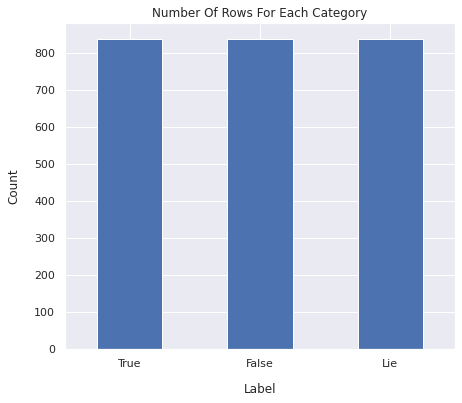

In [ ]:
sns.set(font_scale=1)
y_under = pd.Series(y_under)
y_under.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Number Of Rows For Each Category", y=1);
plt.savefig('Balanced-data')

In [92]:
# SVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', degree = 3,
                                          decision_function_shape='ovo',
                                          probability=True))
clf.fit(X_under, y_under)


# predict on training examples
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4561264822134387


In [93]:
y_pred_train = clf.predict(X_under)
print(accuracy_score(y_under, y_pred_train))

0.8940661091198726


In [94]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_train)

0.8410991636798089

In [95]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average= 'weighted')

0.5117046352691428

In [96]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.6587198278693008

In [99]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average= 'weighted')

0.4561264822134387

In [100]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred, weights = 'quadratic')

0.17706137116624943

In [ ]:
# replace_label = {10: 1, 100:2, 0:0}
# Y_test = [replace_label[item] for item in y_test]

In [101]:
y_score = np.array([y for y in clf.predict_proba(X_test)])
pred = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred, multi_class="ovr", average= 'weighted')

0.6343529586761544

In [115]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.6417791419335276

In [102]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

y_pred_knn = knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test == y_pred_knn)/y_test.shape[0])*100))

Accuracy=39.130434782608695%


In [103]:
y_pred_knn_train = knn_best.predict(X_under)
print("Accuracy={}%".format((sum(y_under == y_pred_knn_train)/y_under.shape[0])*100))

Accuracy=60.65312624452409%


In [104]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_under, y_pred_knn_train)

0.40979689366786154

In [105]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_knn, average= 'weighted')

0.45010013319453623

In [106]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn, average='weighted')

0.6387228376952953

In [107]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn, average= 'weighted')

0.391304347826087

In [108]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred, multi_class="ovr", average= 'weighted')

0.597032693202418

In [116]:
roc_auc_score(y_test, knn_best.predict_proba(X_test), multi_class='ovr')

0.5991998497167695

### ROC curves

In [109]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_under)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [110]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.61


In [111]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.60


In [112]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.60


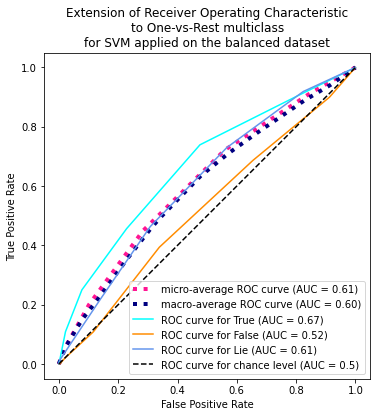

In [113]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Imbalanced-SVM-ROC-all')
plt.show()

### TSNE

In [ ]:
labels = y_under
labels.shape, X_under.shape

((2517,), (2517, 384))

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_under)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2517 samples in 0.001s...
[t-SNE] Computed neighbors for 2517 samples in 0.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2517
[t-SNE] Computed conditional probabilities for sample 2000 / 2517
[t-SNE] Computed conditional probabilities for sample 2517 / 2517
[t-SNE] Mean sigma: 0.300809
[t-SNE] KL divergence after 50 iterations with early exaggeration: 80.264214
[t-SNE] KL divergence after 1000 iterations: 2.160835


In [ ]:
z.shape, labels.shape, X_under.shape

((2517, 2), (2517,), (2517, 384))

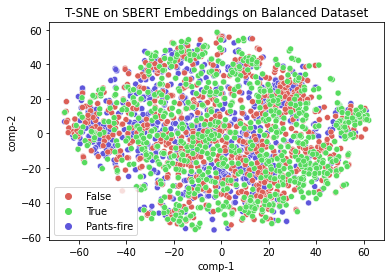

In [ ]:
df1 = pd.DataFrame()
labels = y_under.map({2: 'True', 1: 'False', 0: 'Pants-fire'})
df1["y"] = labels

df1["comp-1"] = z[:,0]

df1["comp-2"] = z[:,1]
sns.scatterplot(x=df1["comp-1"], y=df1["comp-2"], hue=df1.y.tolist(),
                hue_order = ['False', 'True', 'Pants-fire'],
                palette=sns.color_palette("hls", 3),
                data=df1).set(title="T-SNE on SBERT Embeddings on Balanced Dataset");
plt.savefig('sbert-tsne-bal.png')

### PCA

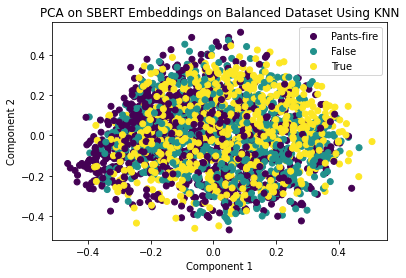

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(X_under)
Xt = pca.transform(X_under)
labels = y_pred_knn_train

plot = plt.scatter(Xt[:,0], Xt[:,1], c=labels)
# plt.rc('image', cmap='jet_r')
plt.legend(handles=plot.legend_elements()[0], labels=['Pants-fire', 'False', 'True'])

plt.xlabel('Component 1') 
plt.ylabel('Component 2') 
plt.title("PCA on SBERT Embeddings on Balanced Dataset Using KNN")
plt.savefig('SBERT-PCA-bal-pred-knn.png')
plt.show();

### ROC

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

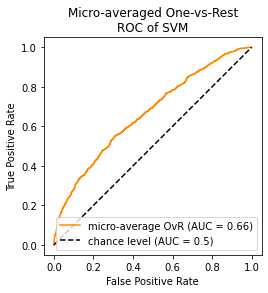

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC of SVM")
plt.legend()
plt.savefig('balanced-SVM-Micro-average-ROC');
plt.show()

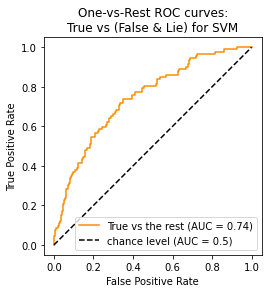

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name= "True vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nTrue vs (False & Lie) for SVM")
plt.legend()
plt.savefig('Balanced-SVM-ROC');
plt.show()

### ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.66


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.66


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.66


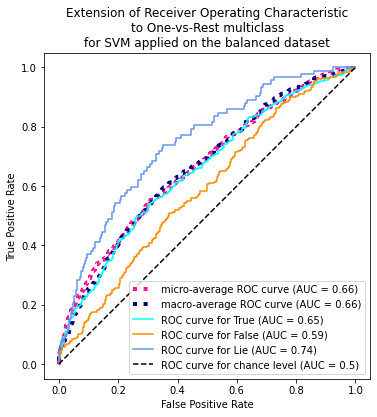

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Balanced-SVM-ROC-all')
plt.show()

### ROC previous

In [ ]:
# ROC for SVM

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: ignored

In [ ]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X_under, y_under)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=38.12154696132597%


In [ ]:
y_pred_knn_train = knn_best.predict(X_under)
print("Accuracy={}%".format((sum(y_under == y_pred_knn_train)/y_under.shape[0])*100))

Accuracy=61.0647596344855%


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, pred, weights = 'quadratic')

0.07315600505051567

In [ ]:
# Different KNN
scaler = preprocessing.StandardScaler().fit(X_under)
Xtrain = scaler.transform(X_under)
Xtest = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(Xtrain, y_under)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.48539857932123126
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       926
           1       0.25      0.36      0.29       249
           2       0.12      0.36      0.18        92

    accuracy                           0.49      1267
   macro avg       0.38      0.42      0.37      1267
weighted avg       0.63      0.49      0.53      1267

[[493 247 186]
 [104  89  56]
 [ 35  24  33]]


No Skill: ROC AUC=0.500
KNN: ROC AUC=0.548


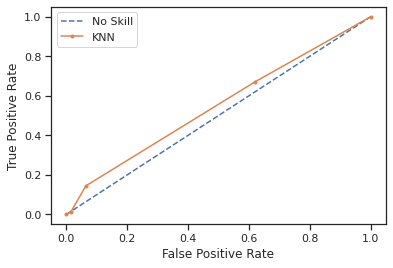

In [ ]:
# ROC for KNN

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
KNN_best: ROC AUC=0.597


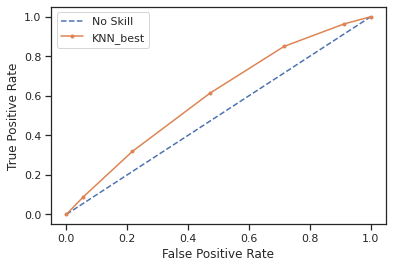

In [ ]:
# ROC for KNN_best

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = knn_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN_best: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average= 'weighted')

0.5512699669196236

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average='weighted')

0.6419626724013932

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, pred, weights = 'quadratic')

0.14683112984355806

In [ ]:
y_score = np.array([y for y in knn_best.predict_proba(X_test)])
pred_knn = y_score/y_score.sum(axis=1,keepdims=1)
roc_auc_score(y_true = y_test, y_score = pred_knn, multi_class="ovr", average= 'weighted')

0.615027465678186

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

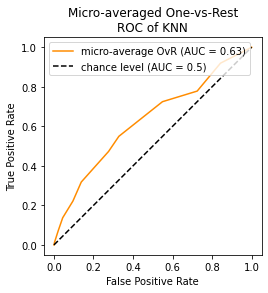

In [ ]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    pred_knn.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC of KNN")
plt.legend()
# plt.savefig('balanced-KNN-Micro-average-ROC');
plt.show()

### ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.63


In [ ]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.63


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.63


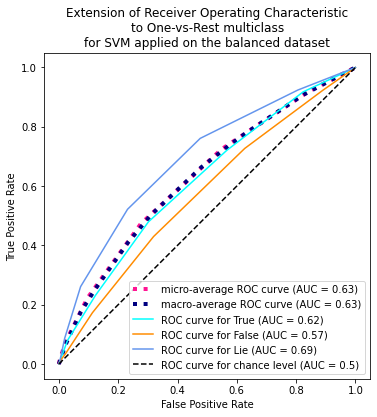

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
target_names = ['True','False','Lie']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass\nfor SVM applied on the balanced dataset")
plt.legend()
plt.savefig('Balanced-KNN-ROC-all')
plt.show()

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')


# 3D t-SNE and PCA

In [ ]:
type(X_under)

numpy.ndarray

In [51]:
pca = PCA(n_components=3)
 
pca.fit(X_under)
 
pca_original = pca.transform(X_under)

In [52]:
Xax = pca_original[:,0]
Yax = pca_original[:,1]
Zax = pca_original[:,2]

In [56]:
cdict = {1:'teal',0:'purple', 2:'yellow'}
label = {0:'Pants-fire',1:'False', 2:'True'}

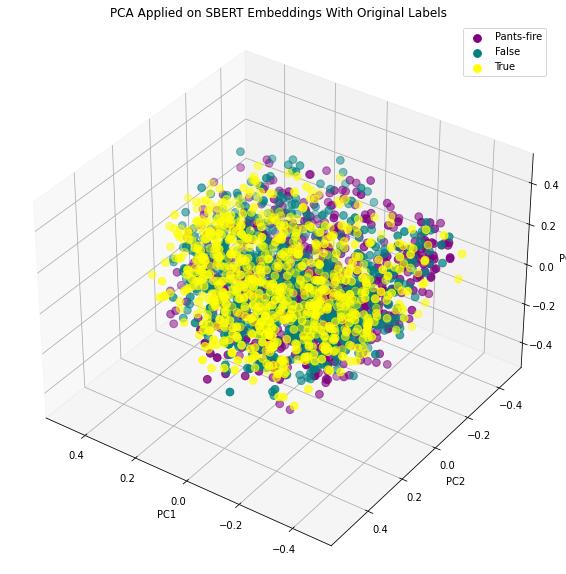

In [57]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_under):
  ix=np.where(y_under==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on SBERT Embeddings With Original Labels")
plt.savefig('sbert-pca-3d.png')
plt.show()

In [61]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
scaled = scaler.fit(X_under)
data = scaler.transform(X_under)

pca = PCA(n_components=3)
components = pca.fit_transform(data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    color=y_under.map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='PCA Applied on SBERT Embeddings with Original Labels',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()
fig.write_image(file='./sbert-tsne-3d.png', format='png')

In [62]:
from sklearn.manifold import TSNE
import plotly.express as px


df = pd.DataFrame(X_under)
features = pd.DataFrame(y_under)

tsne = TSNE(n_components=3)
projections = tsne.fit_transform(X_under,)


In [63]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=y_under.map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on SBERT Embeddings with Original Labels'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./sbert-tsne-3d.png', format='png')

# PCA and t-SNE for SVM Balanced

In [ ]:
y_pred_train

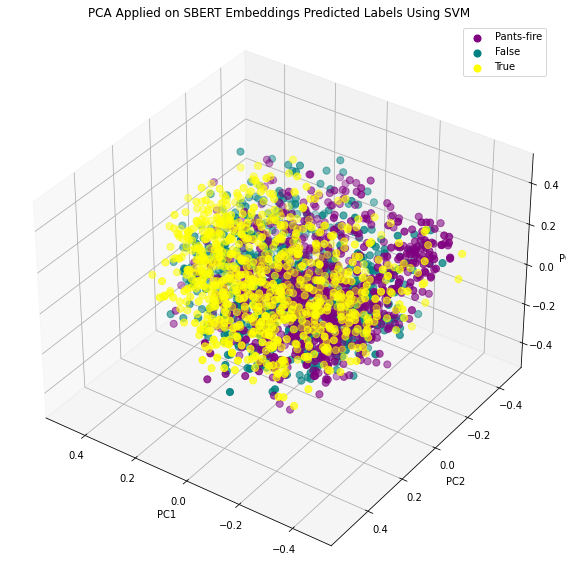

In [67]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_pred_train):
  ix=np.where(y_pred_train==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=50,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on SBERT Embeddings Predicted Labels Using SVM")
plt.savefig('sbert-pca-3d-svm.png')
plt.show()

In [68]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=pd.Series(y_pred_train).map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on SBERT Embeddings Predicted Labels Using SVM'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./sbert-tsne-3d-svm.png', format='png')

In [ ]:
y_pred_knn_train

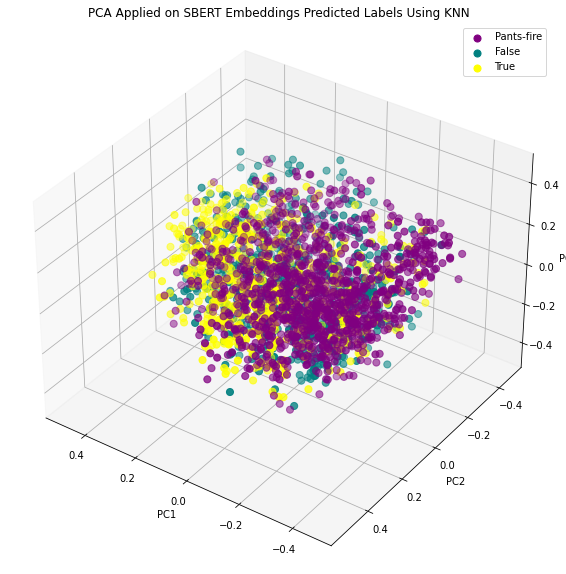

In [73]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y_pred_knn_train):
  ix=np.where(y_pred_knn_train==l)
  ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=50,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=10)
ax.set_ylabel("PC2", 
              fontsize=10)
ax.set_zlabel("PC3", 
              fontsize=10)
 
ax.view_init(35, 125)
ax.legend()
plt.title("PCA Applied on SBERT Embeddings Predicted Labels Using KNN")
plt.savefig('sbert-pca-3d-knn.png')
plt.show()

In [74]:
fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=pd.Series(y_pred_knn_train).map({2: 'True', 1: 'False', 0: 'Pants-fire'}),
    title='t-SNE Applied on SBERT Embeddings Predicted Labels Using KNN'
    )
fig.update_traces(marker_size=8)
fig.show()
fig.write_image(file='./sbert-tsne-3d-knn.png', format='png')

# SMOTE


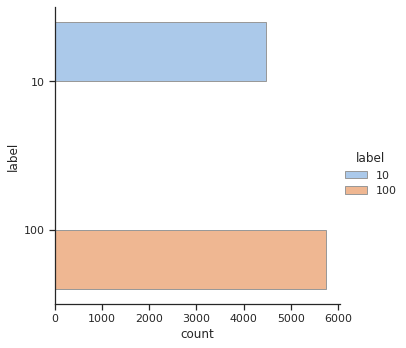

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="label", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

Counter({100: 7397, 10: 1992})
Class=10, n=1900 (38.776%)
Class=100, n=3000 (61.224%)


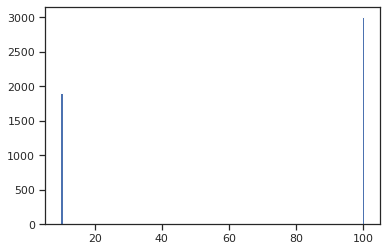

In [ ]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from matplotlib import pyplot
# from numpy import where
# from sklearn.preprocessing import LabelEncoder

# # summarize class distribution
# counter = Counter(y_train)
# print(counter)
# # define pipeline
# strategy = {10:1900, 100:3000}
# # over = SMOTE(sampling_strategy=strategy)
# under = RandomUnderSampler(sampling_strategy=strategy)
# # steps = [('o', over), ('u', under)]
# # pipeline = Pipeline(steps=steps)
# # transform the dataset
# # y = LabelEncoder().fit_transform(y_train)


# # oversample = SMOTE(sampling_strategy=strategy)
# X, y = under.fit_resample(X_train, y_train)

# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()
# # # summarize the new class distribution
# # counter = Counter(y)
# # print(counter)
# # # scatter plot of examples by class label
# # for label, _ in counter.items():
# # 	row_ix = where(y == label)[0]
# # 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# # pyplot.legend()
# # pyplot.show()

# NB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# X_train = X_train.tolist()
model = MultinomialNB(alpha=1)

# Fit the model with training set
model.fit(X_train, y_train)

#Predict labels for the test set
labels = model.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(X_test, labels, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=labels, yticklabels=labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")

# SVM Diff Approach

In [ ]:
# def plotSVC(title):
#   # create a mesh to plot in
#   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#   h = (x_max / x_min)/100
#   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#   plt.subplot(1, 1, 1)
#   Z = SVC.predict(np.c_[xx.ravel(), yy.ravel()])
#   Z = Z.reshape(xx.shape)
#   plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#   plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
#   plt.xlabel('Sepal length')
#   plt.ylabel('Sepal width')
#   plt.xlim(xx.min(), xx.max())
#   plt.title(title)
#   plt.show()

In [ ]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  clf = svm.SVC(kernel=kernel).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred)) 


0.2591868647380766
0.2716966379984363
0.2689601250977326


In [ ]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
  clf = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred)) 

0.2576231430805317
0.2716966379984363
0.2240031274433151
0.21735731039874903


In [ ]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
  clf = svm.SVC(kernel='rbf', C=c).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test, y_pred)) 

0.24824081313526192
0.2716966379984363
0.2627052384675528
0.26309616888193904
0.26309616888193904


In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# clf = SVC(kernel = 'linear')
# clf.fit(features,labels)
# pred = clf.predict(features)
# print(accuracy_score(y_test, pred))


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=cv)
# grid.fit(X, y)

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
# clf.fit(X_train, y_train)

In [ ]:
# y_pred = clf.predict(X_test)
# print(accuracy_score(y_test, y_pred))

# Sbert for experiment

In [ ]:
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes
df['label']

0        1
1        2
2        2
3        1
4        2
        ..
10235    2
10236    2
10237    2
10238    1
10239    0
Name: label, Length: 10232, dtype: int8

In [ ]:
# Testing the model with first 100 rows
batch_1 = df.sample(n=1000)

In [ ]:
batch_1.head(3)

id  label                                          statement  \
5440  12620.json      0  Cincinnati is already one of the biggest citie...   
9771   7119.json      1  Says Delta Air Lines has once again broken a p...   
4952   3061.json      0  Every dropout costs us $72,000 for the life of...   

                                     subjects          speaker  \
5440                                   energy  hillary-clinton   
9771  government-regulation,market-regulation      steve-cohen   
4952                  economy,education,taxes  robert-flanders   

           speaker_job_title    state_info party_affiliation count_1 count_2  \
5440  Presidential candidate      New York          democrat    40.0    29.0   
9771     U.S. Representative     Tennessee          democrat     0.0     0.0   
4952                          Rhode Island    state-official     0.0     0.0   

     count_3 count_4 count_5                      context  ZipLen  
5440    69.0    76.0     7.0  a rally in Cincinnati, Ohio      98  
9771     1.0     0.0     1.0             a press release.      98  
4952     1.0     0.0     0.0            an economic forum      59

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask



#Sentences we want sentence embeddings for
sentences = df.statement.values.tolist()

#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')

#Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

KeyboardInterrupt: ignored

In [ ]:
sentence_embeddings

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df.statement.values.tolist()

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
len(embeddings)

In [ ]:
labels = df.label

# Testing

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_features_labels = pd.DataFrame(features)
df_features_labels['label'] = labels

In [ ]:
df_features_labels.head()

0         1         2         3         4         5         6  \
0 -0.067772 -0.049240  0.143165 -0.073903  0.131885 -0.003473 -0.007921   
1 -0.058497 -0.069370  0.080409  0.008245  0.040320  0.017930 -0.091349   
2 -0.100804 -0.022512  0.190359 -0.103841  0.106887 -0.041575 -0.123545   
3 -0.080146 -0.078613  0.034520 -0.020128  0.153473 -0.013612 -0.032738   
4 -0.045254 -0.083319  0.139746  0.061795  0.104995 -0.033319 -0.099963   

          7         8         9  ...       247       248       249       250  \
0 -0.003494  0.134534 -0.009732  ... -0.075643  0.126568  0.082588 -0.124197   
1 -0.115363  0.074076 -0.021640  ... -0.001902 -0.043114 -0.033034 -0.014791   
2 -0.119900  0.140083 -0.037301  ... -0.050050  0.017314  0.050143 -0.069296   
3 -0.031880  0.132931 -0.140975  ... -0.143712 -0.026728  0.105961 -0.108151   
4 -0.035346  0.071281 -0.006357  ... -0.080487  0.003369  0.085517 -0.026612   

        251       252       253       254       255  label  
0  0.013239 -0.006108 -0.031487  0.002473  0.034561    1.0  
1  0.026069 -0.097683 -0.154229 -0.222704  0.072891    2.0  
2  0.001087 -0.156311 -0.188496 -0.157490  0.041275    3.0  
3  0.018631  0.013507 -0.071556 -0.086075  0.053963    1.0  
4  0.038486 -0.110091 -0.228459 -0.171238  0.033992    2.0  

[5 rows x 257 columns]

In [ ]:
df_sample_200 = df_features_labels.sample(n = 200)
df_sample_200

0         1         2         3         4         5         6  \
4988 -0.038217 -0.087896  0.046424  0.031346  0.005940  0.012633 -0.011027   
5176 -0.035688 -0.007047  0.029236  0.027042  0.020015 -0.056050 -0.005260   
5027  0.029879 -0.074142  0.089301 -0.020292  0.092614 -0.029525 -0.006948   
4162 -0.061891  0.015058  0.064561  0.008183  0.205456  0.026186 -0.011442   
891  -0.087522  0.062214  0.137602 -0.136641  0.133474 -0.093603 -0.114906   
...        ...       ...       ...       ...       ...       ...       ...   
7884 -0.039152 -0.060801  0.096895 -0.001395  0.085476 -0.036325 -0.027620   
7951 -0.099931 -0.051200  0.062510  0.042304  0.069710  0.065968 -0.044866   
1394 -0.023648 -0.086379  0.021016 -0.010731  0.056714 -0.001852 -0.069375   
3993 -0.058337 -0.025861  0.039286 -0.003944  0.098109 -0.032809 -0.031698   
3122 -0.096181 -0.116549  0.088308  0.036602  0.146493  0.054030 -0.053497   

             7         8         9  ...       247       248       249  \
4988 -0.054180  0.044366 -0.063329  ... -0.014803 -0.021613 -0.014324   
5176 -0.052114  0.038539 -0.052136  ... -0.019227 -0.020505 -0.001440   
5027 -0.144929  0.090114  0.002931  ... -0.019051  0.067082  0.027013   
4162 -0.075192  0.045206  0.047346  ... -0.031310  0.000372  0.018974   
891  -0.079306  0.135598 -0.051471  ... -0.038762  0.033642  0.139793   
...        ...       ...       ...  ...       ...       ...       ...   
7884 -0.071589  0.033634 -0.027450  ... -0.040963  0.032451  0.079706   
7951 -0.061371  0.114949 -0.072726  ...  0.005987 -0.025327 -0.015465   
1394 -0.079961  0.058137 -0.070433  ...  0.030704  0.049977  0.066499   
3993 -0.052297  0.049355 -0.052383  ... -0.048951  0.057329  0.091605   
3122 -0.088284  0.079746 -0.079629  ... -0.021469 -0.131665 -0.053182   

           250       251       252       253       254       255  label  
4988 -0.027181  0.065689 -0.077230 -0.099795 -0.085923  0.067424    3.0  
5176  0.020191  0.019701 -0.129423 -0.111946 -0.016475  0.017624    1.0  
5027  0.036731  0.081741 -0.051314 -0.117300  0.024326  0.033816    2.0  
4162  0.120903  0.060898 -0.083548 -0.092383  0.062744  0.026270    4.0  
891  -0.045303 -0.012066 -0.152546 -0.131230 -0.094552 -0.090054    4.0  
...        ...       ...       ...       ...       ...       ...    ...  
7884 -0.041142  0.050355 -0.098971 -0.061703 -0.027278 -0.000617    3.0  
7951  0.022133  0.078832 -0.065495 -0.119971 -0.115042  0.029967    5.0  
1394 -0.091623  0.116347 -0.077459 -0.040947 -0.076766 -0.017545    3.0  
3993 -0.018479  0.055552 -0.100457 -0.084764 -0.006688  0.055604    1.0  
3122  0.084036  0.100018 -0.004917  0.003885  0.009998 -0.031698    4.0  

[200 rows x 257 columns]

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df_sample_200, hue='label', height=3);
plt.show()

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(df_sample_200, hue='label', size=5).map(plt.scatter) \
.add_legend();
plt.show()

# Scatter Plot

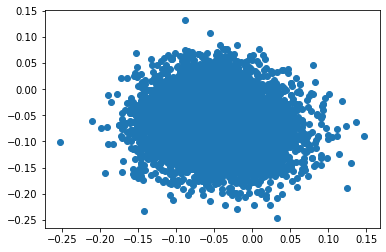

In [ ]:
plt.scatter(embeddings[:,0], embeddings[:,1])
plt.show();

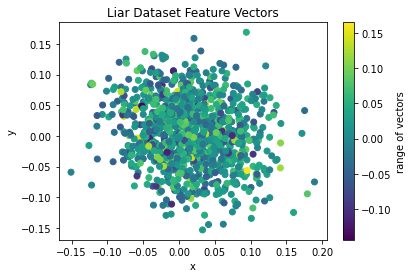

In [ ]:
plt.scatter(embeddings[:,0], embeddings[:,1], c=embeddings[:,2])
cbar = plt.colorbar()
cbar.set_label("range of vectors")
plt.title("Liar Dataset Feature Vectors")
plt.xlabel("x")
plt.ylabel("y")

plt.show();


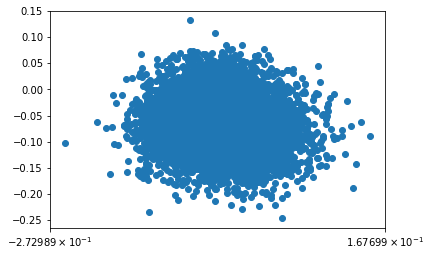

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 0], features[:, 1])
plt.xscale('symlog')
plt.show()

In [ ]:
xyz=np.array(np.random.random((1000,256)))

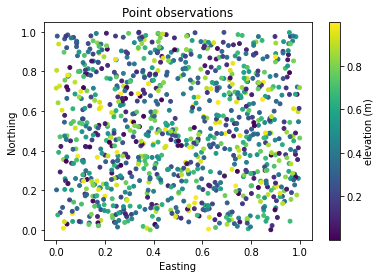

In [ ]:
marker_size=15
plt.scatter(xyz[:,0], xyz[:,1], marker_size, c=xyz[:,2])
plt.title("Point observations")
plt.xlabel("Easting")
plt.ylabel("Northing")
cbar= plt.colorbar()
cbar.set_label("elevation (m)", labelpad=+1)
plt.show()

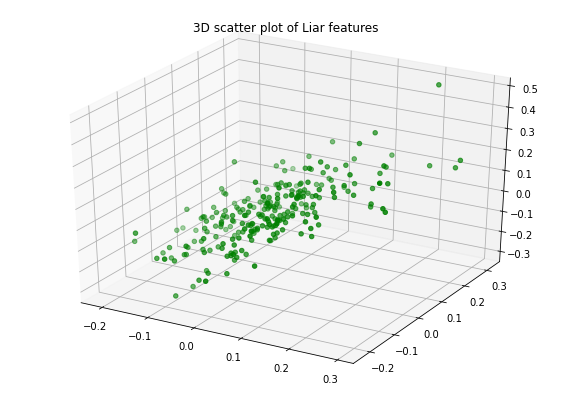

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = features[2]
x = features[0]
y = features[1]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("3D scatter plot of Liar features")
 
# show plot
plt.show()

# doc2vec

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['clean'] = df['statement'].apply(cleanText)

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
def tokenize_text(text):
  tokens = []
  for sent in nltk.sent_tokenize(text):
    for word in nltk.word_tokenize(sent):
      if len(word) < 2:
        continue
      tokens.append(word.lower())
  return tokens

train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['clean']), tags=[r.label]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['clean']), tags=[r.label]), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=256, negative=5, hs=0, min_count=10, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7162/7162 [00:00<00:00, 792079.24it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 7162/7162 [00:00<00:00, 1146243.57it/s]


CPU times: user 16.7 s, sys: 3.06 s, total: 19.8 s
Wall time: 13.2 s


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.21140065146579803
Testing F1 score: 0.16840395940113595


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7162/7162 [00:00<00:00, 2186606.87it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 7162/7162 [00:00<00:00, 1469216.73it/s]


CPU times: user 44.3 s, sys: 6.82 s, total: 51.1 s
Wall time: 40.4 s


In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.195114006514658
Testing F1 score: 0.19514694185603626


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
!pip install testfixtures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.3 MB/s 


In [ ]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [ ]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.1931596091205212
Testing F1 score: 0.19394454482310475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# KNN Try on Test and diff classifications


In [ ]:
# Hyperparameter tuning on KNN
# Gridsearch Cv

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import transformers as ppb
import seaborn as sns
from time import time
%matplotlib inline
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
import sklearn

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
# grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,18,20,30,50],
#                 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}

# KNN_model=neighbors.KNeighborsClassifier()

# gs = GridSearchCV(KNN_model, grid_params, verbose = 2, cv=3, n_jobs = -1)

# # fit the model on our train set
# g_res = gs.fit(X_train, y_train)
# # get the hyperparameters with the best score
# g_res.best_params_

# use the best hyperparameters
knn_best = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',
                                          weights = 'uniform', algorithm = 'kd_tree')
knn_best.fit(X, y)

pred=knn_best.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=59.36758893280633%
